# EDA

## Loading Cleaned Data

In [1]:
import pandas as pd
import numpy as np

file_path = "../data/loan_data_cleaned.csv"
df = pd.read_csv(file_path)

In [2]:
print(df.shape)
df.dtypes.value_counts()

(1345310, 87)


float64    74
object     12
int64       1
Name: count, dtype: int64

The date columns have changed type to object, so let's fix this.

In [3]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce') # Force errors to be NaT if not a valid datetime
df.dtypes.value_counts()

float64           74
object            11
datetime64[ns]     1
int64              1
Name: count, dtype: int64

## Analysing Target Variable

In [4]:
df['target'].value_counts(normalize=True)

target
0    0.800374
1    0.199626
Name: proportion, dtype: float64

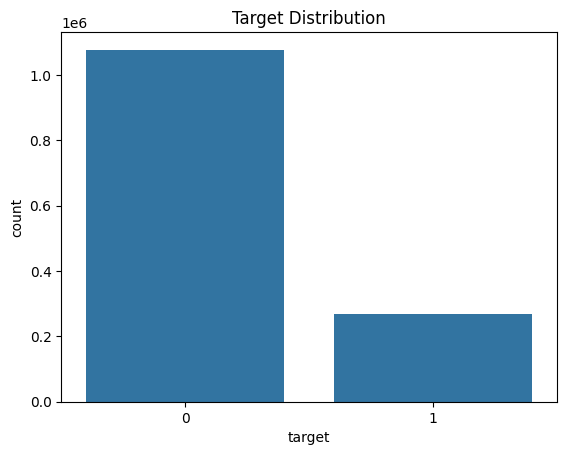

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='target')
plt.title("Target Distribution")
plt.show()

The target is clearly imbalanced, with an 80/20 split. We may need to implement methods in the model building stage to handle this.

## Analysing Features

### Initial View

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
numerical_cols = df.select_dtypes(include=['number', 'bool']).columns.tolist()
df[numerical_cols].head()

loan_amnt  term  int_rate  installment  emp_length  annual_inc    dti  \
0     3600.0  36.0     13.99       123.03        10.0     55000.0   5.91   
1    24700.0  36.0     11.99       820.28        10.0     65000.0  16.06   
2    20000.0  60.0     10.78       432.66        10.0     63000.0  10.78   
3    10400.0  60.0     22.45       289.91         3.0    104433.0  25.37   
4    11950.0  36.0     13.44       405.18         4.0     34000.0  10.20   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0          0.0           675.0            679.0             1.0   
1          1.0           715.0            719.0             4.0   
2          0.0           695.0            699.0             0.0   
3          1.0           695.0            699.0             3.0   
4          0.0           690.0            694.0             0.0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                    30.0       7.0      0.0     2765.0        29.7   
1                     6.0      22.0      0.0    21470.0        19.2   
2                     NaN       6.0      0.0     7869.0        56.2   
3                    12.0      12.0      0.0    21929.0        64.5   
4                     NaN       5.0      0.0     8822.0        68.4   

   total_acc  collections_12_mths_ex_med  mths_since_last_major_derog  \
0       13.0                         0.0                         30.0   
1       38.0                         0.0                          NaN   
2       18.0                         0.0                          NaN   
3       35.0                         0.0                          NaN   
4        6.0                         0.0                          NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  \
0             0.0         722.0     144904.0          2.0          2.0   
1             0.0           0.0     204396.0          1.0          1.0   
2             0.0           0.0     189699.0          0.0          1.0   
3             0.0           0.0     331730.0          1.0          3.0   
4             0.0           0.0      12798.0          0.0          1.0   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          0.0          1.0                21.0        4981.0     36.0   
1          0.0          1.0                19.0       18005.0     73.0   
2          0.0          4.0                19.0       10827.0     73.0   
3          0.0          3.0                14.0       73839.0     84.0   
4          0.0          0.0               338.0        3976.0     99.0   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          3.0          3.0       722.0      34.0            9300.0     3.0   
1          2.0          3.0      6472.0      29.0          111800.0     0.0   
2          0.0          2.0      2081.0      65.0           14000.0     2.0   
3          4.0          7.0      9702.0      78.0           34000.0     2.0   
4          0.0          0.0      4522.0      76.0           12900.0     0.0   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          1.0           4.0                   4.0      20701.0   
1          0.0           6.0                   4.0       9733.0   
2          5.0           1.0                   6.0      31617.0   
3          1.0           3.0                  10.0      27644.0   
4          0.0           0.0                   0.0       2560.0   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0          1506.0     37.2                       0.0          0.0   
1         57830.0     27.1                       0.0          0.0   
2          2737.0     55.9                       0.0          0.0   
3          4567.0     77.5                       0.0          0.0   
4           844.0     91.0                       0.0          0.0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0               148.0   

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df[categorical_cols].head()

grade sub_grade             emp_title home_ownership verification_status  \
0     C        C4               leadman       MORTGAGE        Not Verified   
1     C        C1              Engineer       MORTGAGE        Not Verified   
2     B        B4          truck driver       MORTGAGE        Not Verified   
3     F        F1   Contract Specialist       MORTGAGE     Source Verified   
4     C        C3  Veterinary Tecnician           RENT     Source Verified   

              purpose               title zip_code addr_state  \
0  debt_consolidation  Debt consolidation    190xx         PA   
1      small_business            Business    577xx         SD   
2    home_improvement                 NaN    605xx         IL   
3      major_purchase      Major purchase    174xx         PA   
4  debt_consolidation  Debt consolidation    300xx         GA   

  initial_list_status application_type  
0                   w       Individual  
1                   w       Individual  
2                   w        Joint App  
3                   w       Individual  
4                   w       Individual

In [9]:
df[numerical_cols].describe()

loan_amnt          term      int_rate   installment    emp_length  \
count  1.345310e+06  1.345310e+06  1.345310e+06  1.345310e+06  1.266799e+06   
mean   1.441997e+04  4.179020e+01  1.323962e+01  4.380755e+02  6.008524e+00   
std    8.717051e+03  1.026832e+01  4.768716e+00  2.615126e+02  3.624267e+00   
min    5.000000e+02  3.600000e+01  5.310000e+00  4.930000e+00  5.000000e-01   
25%    8.000000e+03  3.600000e+01  9.750000e+00  2.484800e+02  2.000000e+00   
50%    1.200000e+04  3.600000e+01  1.274000e+01  3.754300e+02  6.000000e+00   
75%    2.000000e+04  3.600000e+01  1.599000e+01  5.807300e+02  1.000000e+01   
max    4.000000e+04  6.000000e+01  3.099000e+01  1.719830e+03  1.000000e+01   

         annual_inc           dti   delinq_2yrs  fico_range_low  \
count  1.345310e+06  1.344936e+06  1.345310e+06    1.345310e+06   
mean   7.624764e+04  1.828267e+01  3.177944e-01    6.961850e+02   
std    6.992510e+04  1.116045e+01  8.779922e-01    3.185251e+01   
min    0.000000e+00 -1.000000e+00  0.000000e+00    6.250000e+02   
25%    4.578000e+04  1.179000e+01  0.000000e+00    6.700000e+02   
50%    6.500000e+04  1.761000e+01  0.000000e+00    6.900000e+02   
75%    9.000000e+04  2.406000e+01  0.000000e+00    7.100000e+02   
max    1.099920e+07  9.990000e+02  3.900000e+01    8.450000e+02   

       fico_range_high  inq_last_6mths  mths_since_last_delinq      open_acc  \
count     1.345310e+06    1.345309e+06           666567.000000  1.345310e+06   
mean      7.001852e+02    6.550807e-01               34.312069  1.159352e+01   
std       3.185316e+01    9.377739e-01               21.919162  5.473789e+00   
min       6.290000e+02    0.000000e+00                0.000000  0.000000e+00   
25%       6.740000e+02    0.000000e+00               16.000000  8.000000e+00   
50%       6.940000e+02    0.000000e+00               31.000000  1.100000e+01   
75%       7.140000e+02    1.000000e+00               50.000000  1.400000e+01   
max       8.500000e+02    8.000000e+00              226.000000  9.000000e+01   

            pub_rec     revol_bal    revol_util     total_acc  \
count  1.345310e+06  1.345310e+06  1.344453e+06  1.345310e+06   
mean   2.152760e-01  1.624811e+04  5.181002e+01  2.498084e+01   
std    6.018647e-01  2.232817e+04  2.452107e+01  1.199847e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00   
25%    0.000000e+00  5.943000e+03  3.340000e+01  1.600000e+01   
50%    0.000000e+00  1.113400e+04  5.220000e+01  2.300000e+01   
75%    0.000000e+00  1.975575e+04  7.070000e+01  3.200000e+01   
max    8.600000e+01  2.904836e+06  8.923000e+02  1.760000e+02   

       collections_12_mths_ex_med  mths_since_last_major_derog  \
count                1.345254e+06                353750.000000   
mean                 1.713357e-02                    43.701165   
std                  1.469153e-01                    21.378476   
min                  0.000000e+00                     0.000000   
25%                  0.000000e+00                    27.000000   
50%                  0.000000e+00                    44.000000   
75%                  0.000000e+00                    61.000000   
max                  2.000000e+01                   226.000000   

       acc_now_delinq  tot_coll_amt   tot_cur_bal    open_acc_6m  \
count    1.345310e+06  1.277783e+06  1.277783e+06  537597.000000   
mean     5.045677e-03  2.493859e+02  1.411338e+05       1.050562   
std      7.716111e-02  1.106497e+04  1.575478e+05       1.208835   
min      0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%      0.000000e+00  0.000000e+00  2.942300e+04       0.000000   
50%      0.000000e+00  0.000000e+00  8.023100e+04       1.000000   
75%      0.000000e+00  0.000000e+00  2.107150e+05       2.000000   
max      1.400000e+01  9.152545e+06  8.000078e+06      18.000000   

         open_act_il    open_il_12m    open_il_24m  mths_since_rcnt_il  \
count  537598.000000  537598.000000  537598.000000       523382.000000   
mean        2.792555       0.77

### Null %

In [10]:
# Let's look at % of null values in all columns with > 20% null values.
# Note that 20% gives the same results as 50% since there are no features with 20% < x < 50%, where x is the % of nulls in the column.
missing_20 = df[numerical_cols].isnull().mean()[df.isnull().mean() > 0.2].sort_values(ascending=False)
print(missing_20)

mths_since_recent_bc_dlq          0.762865
mths_since_last_major_derog       0.737049
mths_since_recent_revol_delinq    0.665533
il_util                           0.654343
mths_since_rcnt_il                0.610958
all_util                          0.600430
open_acc_6m                       0.600392
inq_last_12m                      0.600392
total_cu_tl                       0.600392
max_bal_bc                        0.600391
inq_fi                            0.600391
open_rv_12m                       0.600391
open_rv_24m                       0.600391
total_bal_il                      0.600391
open_il_24m                       0.600391
open_il_12m                       0.600391
open_act_il                       0.600391
mths_since_last_delinq            0.504525
dtype: float64


In [11]:
missing_20_cols = missing_20.index.tolist()
missing_20_correlations = df[missing_20_cols + ['target']].corr()['target'].drop('target')
missing_20_correlations = missing_20_correlations.sort_values(ascending=False)
print(missing_20_correlations)

all_util                          0.089014
open_rv_24m                       0.081912
open_rv_12m                       0.063358
open_acc_6m                       0.059005
inq_last_12m                      0.058555
il_util                           0.045885
open_il_12m                       0.041488
open_il_24m                       0.038829
inq_fi                            0.038531
open_act_il                       0.007876
total_bal_il                     -0.002473
mths_since_last_major_derog      -0.006749
mths_since_recent_bc_dlq         -0.011391
mths_since_recent_revol_delinq   -0.012120
mths_since_last_delinq           -0.012326
total_cu_tl                      -0.013838
mths_since_rcnt_il               -0.021074
max_bal_bc                       -0.037529
Name: target, dtype: float64


In [12]:
# Look at missing values and correlation side by side
nulls_summary = pd.DataFrame({'missing_%': missing_20 * 100, 'correlation_with_target': missing_20_correlations}).sort_values(by='missing_%', ascending=False).round(3)
print(nulls_summary)

                                missing_%  correlation_with_target
mths_since_recent_bc_dlq           76.287                   -0.011
mths_since_last_major_derog        73.705                   -0.007
mths_since_recent_revol_delinq     66.553                   -0.012
il_util                            65.434                    0.046
mths_since_rcnt_il                 61.096                   -0.021
all_util                           60.043                    0.089
inq_last_12m                       60.039                    0.059
open_acc_6m                        60.039                    0.059
total_cu_tl                        60.039                   -0.014
max_bal_bc                         60.039                   -0.038
inq_fi                             60.039                    0.039
open_act_il                        60.039                    0.008
open_il_12m                        60.039                    0.041
open_il_24m                        60.039                    0

In [13]:
# Let's pick and choose which columns to drop based on missing % and correlation with the target.
# We could do this programmatically, but it's good to consider the trade-off between amount of nulls and correlation with the target.
null_cols_to_drop = ['mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_rcnt_il','total_cu_tl','open_act_il','total_bal_il','mths_since_last_delinq']

In [14]:
null_cols_to_keep = [col for col in nulls_summary.index if col not in null_cols_to_drop]
keep_nulls_summary = nulls_summary.loc[null_cols_to_keep]
print(keep_nulls_summary)

              missing_%  correlation_with_target
il_util          65.434                    0.046
all_util         60.043                    0.089
inq_last_12m     60.039                    0.059
open_acc_6m      60.039                    0.059
max_bal_bc       60.039                   -0.038
inq_fi           60.039                    0.039
open_il_12m      60.039                    0.041
open_il_24m      60.039                    0.039
open_rv_12m      60.039                    0.063
open_rv_24m      60.039                    0.082


We need to consider what we want to do with the rest of these features, as imputing > 60% of the values in a column is far from ideal. We can look at whether we actually need all of these columns, if we can impute safely with '0' in some cases, if we can use a flag feature instead etc.

Edit: Even though initially it seemed that we could impute most of these columns with 0, it now seems that we cannot.

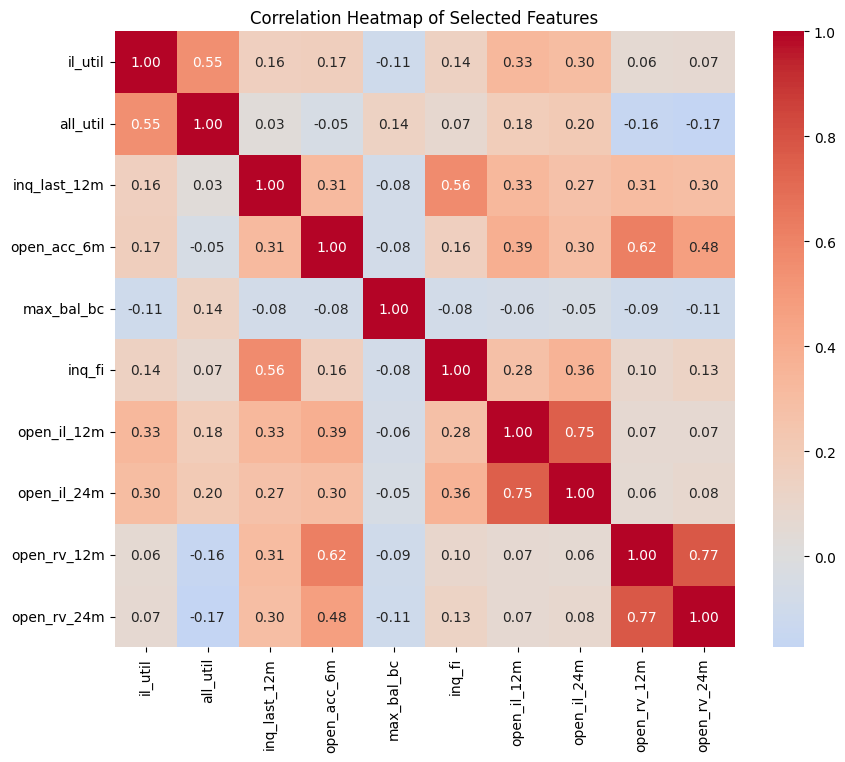

In [15]:
keep_nulls_df = df[keep_nulls_summary.index]
corr_matrix = keep_nulls_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


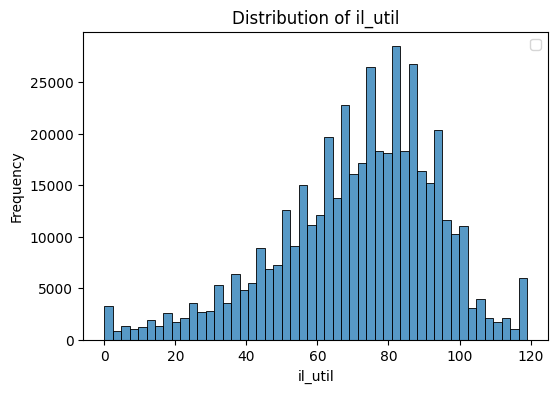

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


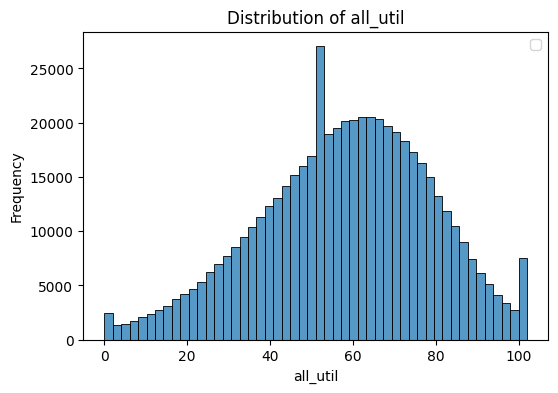

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


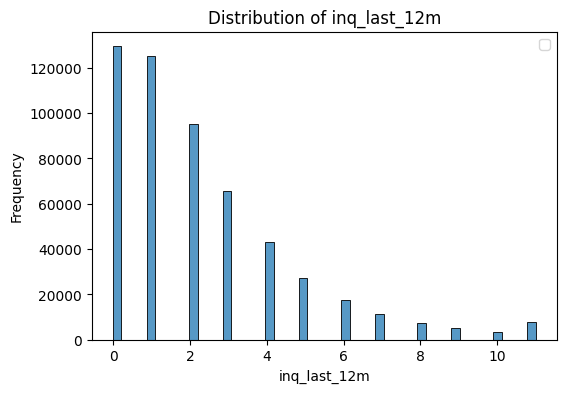

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


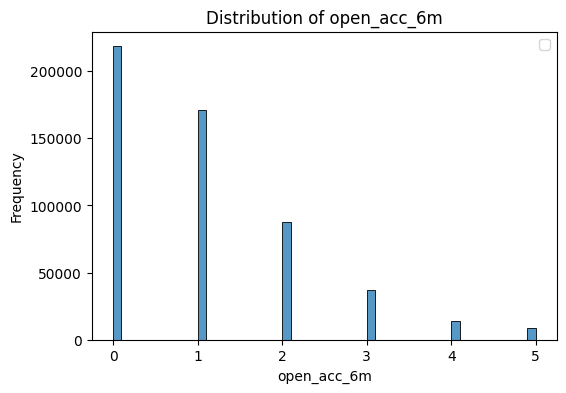

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


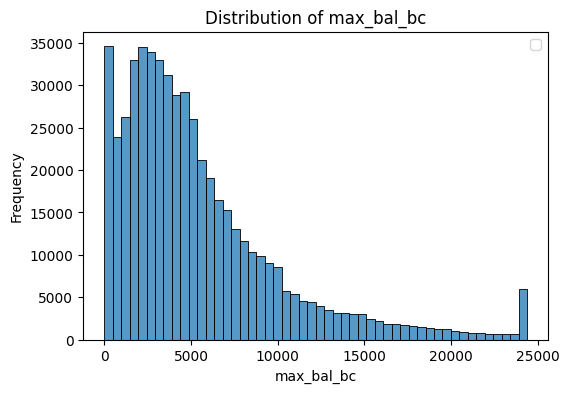

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


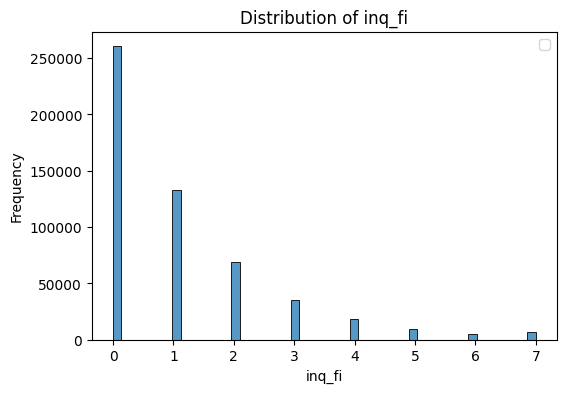

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


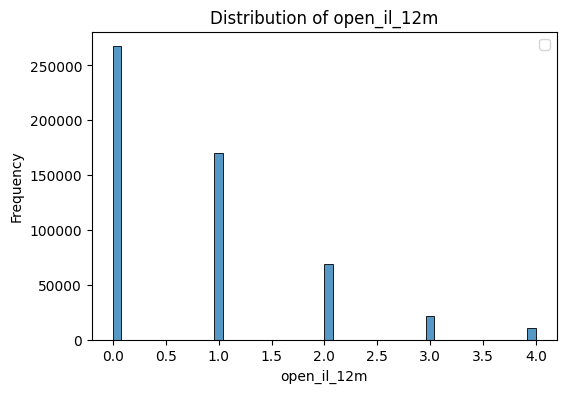

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


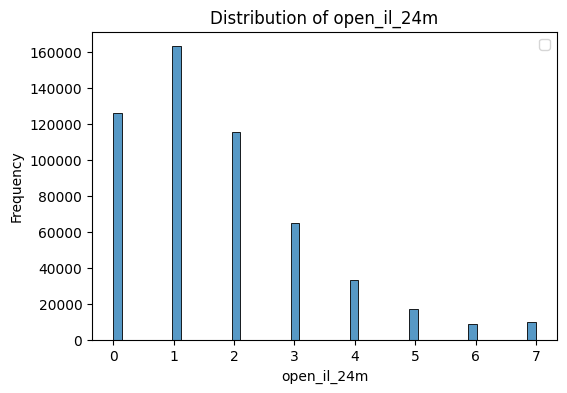

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


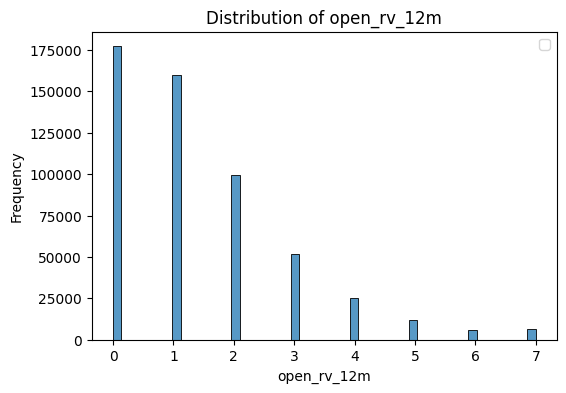

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\3263263826.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


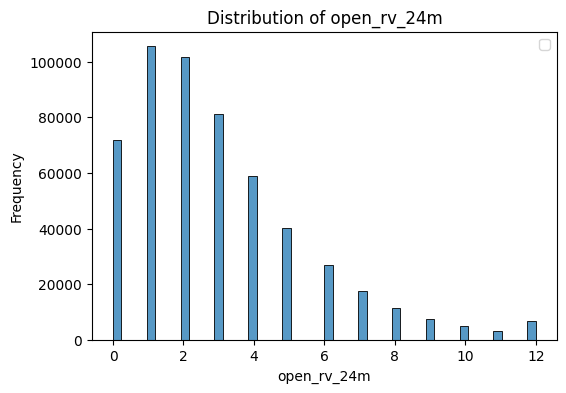

In [16]:
for col in keep_nulls_df.columns:

    clipped_data = df[col].clip(upper=df[col].quantile(0.99)) # Reduce the visual effects of outliers so we can better understand the distribution from a graph.

    plt.figure(figsize=(6, 4))
    sns.histplot(clipped_data, bins=50, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

For now, let's also drop these columns as there are far too many null values to impute and maintain accuracy. We may revisit this after we've done some modelling to see if we can keep features with a higher correlation to the target such as all_util in order to help us improve model accuracy. We could then use a null flag column for ones we do want to keep, so that any models we build can use the information that a column was originally null.

In [17]:
# cols_to_impute_other = ['all_util','il_util','max_bal_bc']
# cols_to_impute_zeros = [col for col in keep_nulls_df.columns if col not in cols_to_impute_other]

# print(cols_to_impute_other)
# print(cols_to_impute_zeros)

In [18]:
null_cols_to_drop = null_cols_to_drop + keep_nulls_df.columns.tolist()

### Zero Ratio

In [19]:
# Now, let's look at % of zero values in all columns with > 30% zero values.
zero_ratio = (df[numerical_cols] == 0).mean()
high_zeros = zero_ratio[zero_ratio > 0.3].sort_values(ascending=False)
print(high_zeros)

delinq_amnt                   0.996284
acc_now_delinq                0.995289
chargeoff_within_12_mths      0.991901
collections_12_mths_ex_med    0.984318
tax_liens                     0.967800
num_tl_30dpd                  0.946752
num_tl_120dpd_2m              0.912023
num_tl_90g_dpd_24m            0.895356
pub_rec_bankruptcies          0.874856
pub_rec                       0.830608
delinq_2yrs                   0.807293
tot_coll_amt                  0.804288
target                        0.800374
num_accts_ever_120_pd         0.724878
inq_last_6mths                0.572669
mort_acc                      0.389380
dtype: float64


In [20]:
high_zero_cols = high_zeros.index.tolist()
high_zero_correlations = df[high_zero_cols].corr()['target'].drop('target')
high_zero_correlations = high_zero_correlations.sort_values(ascending=False)
print(high_zero_correlations)

inq_last_6mths                0.065454
pub_rec                       0.026194
pub_rec_bankruptcies          0.025308
delinq_2yrs                   0.019381
collections_12_mths_ex_med    0.016034
num_accts_ever_120_pd         0.010384
num_tl_90g_dpd_24m            0.009896
tax_liens                     0.009749
acc_now_delinq                0.003951
chargeoff_within_12_mths      0.003175
delinq_amnt                   0.002800
num_tl_30dpd                  0.002601
num_tl_120dpd_2m              0.001295
tot_coll_amt                 -0.000446
mort_acc                     -0.075294
Name: target, dtype: float64


In [21]:
# Look at zero values and correlation side by side
nulls_summary = pd.DataFrame({'zero_%': high_zeros.drop('target') * 100, 'correlation_with_target': high_zero_correlations}).sort_values(by='zero_%', ascending=False).round(3)
print(nulls_summary)

                            zero_%  correlation_with_target
delinq_amnt                 99.628                    0.003
acc_now_delinq              99.529                    0.004
chargeoff_within_12_mths    99.190                    0.003
collections_12_mths_ex_med  98.432                    0.016
tax_liens                   96.780                    0.010
num_tl_30dpd                94.675                    0.003
num_tl_120dpd_2m            91.202                    0.001
num_tl_90g_dpd_24m          89.536                    0.010
pub_rec_bankruptcies        87.486                    0.025
pub_rec                     83.061                    0.026
delinq_2yrs                 80.729                    0.019
tot_coll_amt                80.429                   -0.000
num_accts_ever_120_pd       72.488                    0.010
inq_last_6mths              57.267                    0.065
mort_acc                    38.938                   -0.075


In [22]:
# Let's pick and choose which columns to drop based on zero % and correlation with the target.
# We could do this programmatically, but again it's good to consider the trade-off between zero ratio and correlation with the target.
zero_cols_to_drop=['delinq_amnt','acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','num_tl_30dpd','num_tl_120dpd_2m','num_tl_90g_dpd_24m','tot_coll_amt','num_accts_ever_120_pd']

### Numerical Features - Unique Values

In [23]:
df[numerical_cols].nunique().sort_values()

target                             2
term                               2
num_tl_30dpd                       5
num_tl_120dpd_2m                   6
acc_now_delinq                     8
                               ...  
total_bal_il                  118364
total_il_high_credit_limit    162548
total_bal_ex_mort             177995
tot_cur_bal                   400459
tot_hi_cred_lim               427440
Length: 75, dtype: int64

In [24]:
df['term'].value_counts()

term
36.0    1020743
60.0     324567
Name: count, dtype: int64

In [25]:
# Since term is either 36 or 60, it is more of a categorical feature than a numerical one.
df['term'] = df['term'].astype('object')
numerical_cols = df.select_dtypes(include=['number', 'bool']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

### Numerical Features - Variance

num_tl_120dpd_2m              0.000930
num_tl_30dpd                  0.003887
acc_now_delinq                0.005954
chargeoff_within_12_mths      0.012038
collections_12_mths_ex_med    0.021584
dtype: float64


<Axes: title={'center': 'Low Variance Features'}>

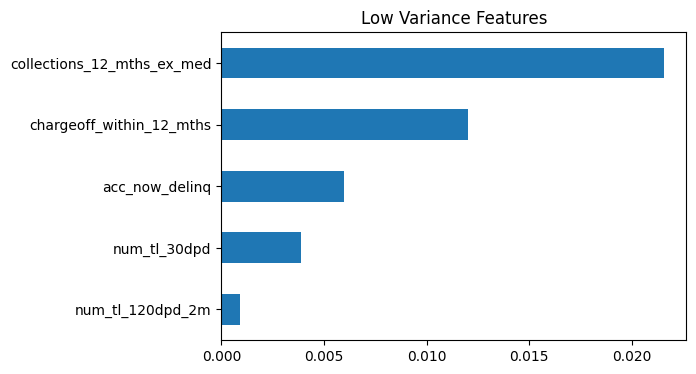

In [26]:
variances = df[numerical_cols].var().sort_values()
low_variance = variances[variances < 0.05]  # Also tried 0.1 and 0.025 but they produce the same result in this example
print(low_variance)
low_variance.plot(kind='barh', figsize=(6, 4), title='Low Variance Features')

In [27]:
df[low_variance.index.tolist()].describe()

num_tl_120dpd_2m  num_tl_30dpd  acc_now_delinq  \
count      1.227909e+06  1.277783e+06    1.345310e+06   
mean       8.200933e-04  3.418421e-03    5.045677e-03   
std        3.049884e-02  6.234788e-02    7.716111e-02   
min        0.000000e+00  0.000000e+00    0.000000e+00   
25%        0.000000e+00  0.000000e+00    0.000000e+00   
50%        0.000000e+00  0.000000e+00    0.000000e+00   
75%        0.000000e+00  0.000000e+00    0.000000e+00   
max        6.000000e+00  4.000000e+00    1.400000e+01   

       chargeoff_within_12_mths  collections_12_mths_ex_med  
count              1.345254e+06                1.345254e+06  
mean               9.062229e-03                1.713357e-02  
std                1.097191e-01                1.469153e-01  
min                0.000000e+00                0.000000e+00  
25%                0.000000e+00                0.000000e+00  
50%                0.000000e+00                0.000000e+00  
75%                0.000000e+00                0.000000e+00  
max                1.000000e+01                2.000000e+01

In [28]:
low_variance_cols = low_variance.index.tolist()
low_variance_correlations = df[low_variance_cols + ['target']].corr()['target'].drop('target')
low_variance_correlations = low_variance_correlations.sort_values(ascending=False)
print(low_variance_correlations)

collections_12_mths_ex_med    0.016034
acc_now_delinq                0.003951
chargeoff_within_12_mths      0.003175
num_tl_30dpd                  0.002601
num_tl_120dpd_2m              0.001295
Name: target, dtype: float64


In [29]:
# Let's drop these columns as they all have variance below 2.5% and low predictive signal.
# Note that 'collections_12_mths_ex_med' has relatively higher variance and signal than the rest, but we are still going to drop it.
low_var_cols_to_drop = low_variance_cols

In [30]:
cv = df[numerical_cols].std() / df[numerical_cols].mean()
cv = cv.abs().sort_values()
print(cv)

fico_range_high      0.045492
fico_range_low       0.045753
pct_tl_nvr_dlq       0.092860
il_util              0.320759
all_util             0.359862
                      ...    
acc_now_delinq      15.292518
num_tl_30dpd        18.238796
num_tl_120dpd_2m    37.189468
tot_coll_amt        44.368876
delinq_amnt         54.346858
Length: 74, dtype: float64


In [31]:
# These are the only two features that we might consider dropping based on the coefficient of variation. We probably won't but let's check their correlation with the target anyway.
df[['fico_range_high','fico_range_low'] + ['target']].corr()['target'].drop('target')
# Clearly they provide too much information to even consider dropping.

fico_range_high   -0.130682
fico_range_low    -0.130683
Name: target, dtype: float64

### Numerical Features - Distribution Analysis

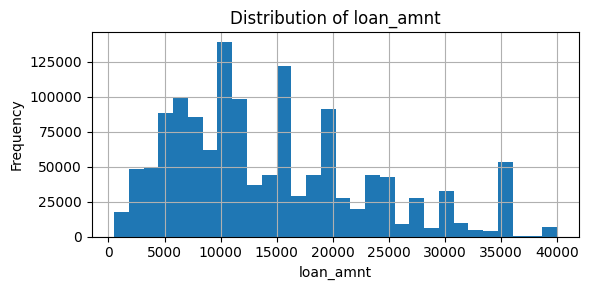

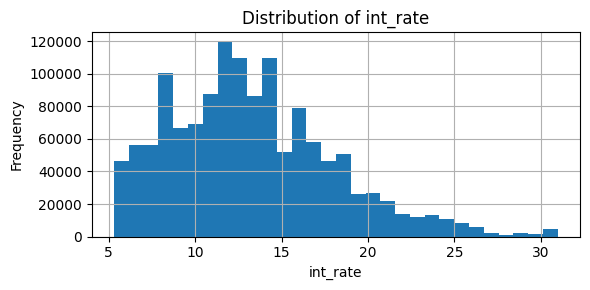

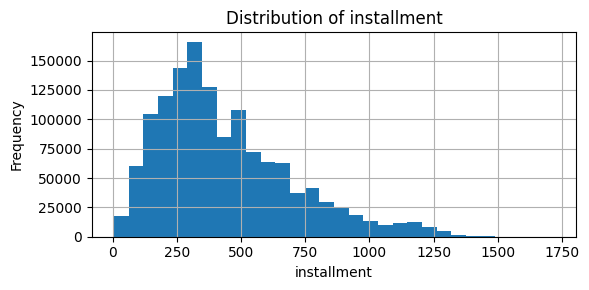

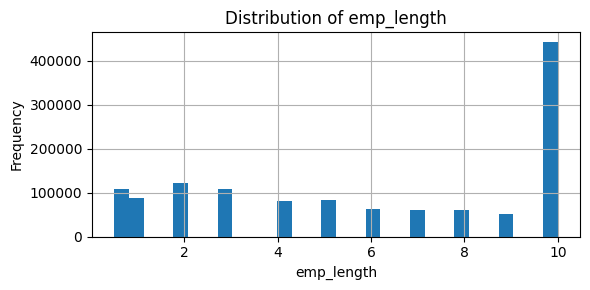

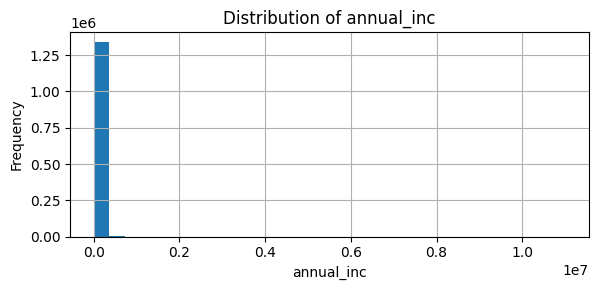

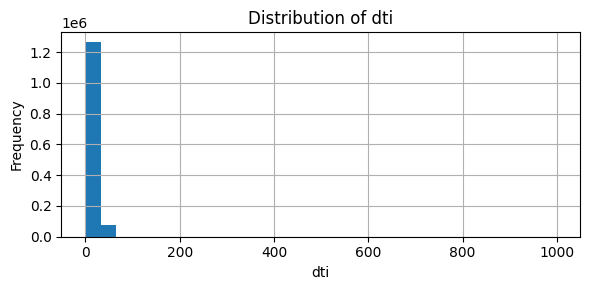

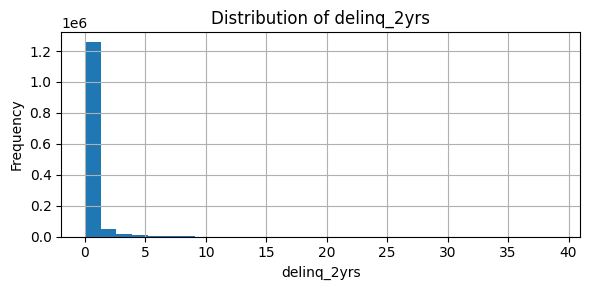

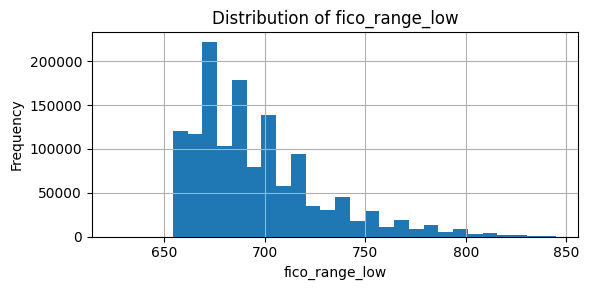

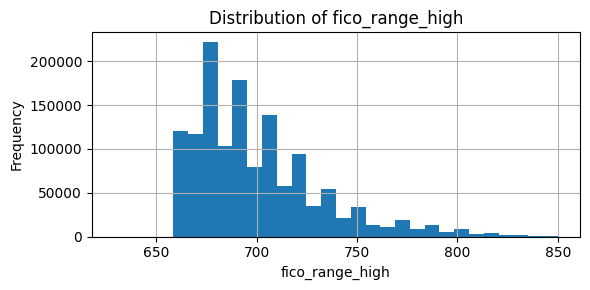

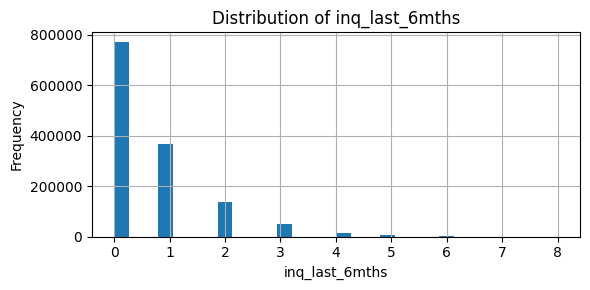

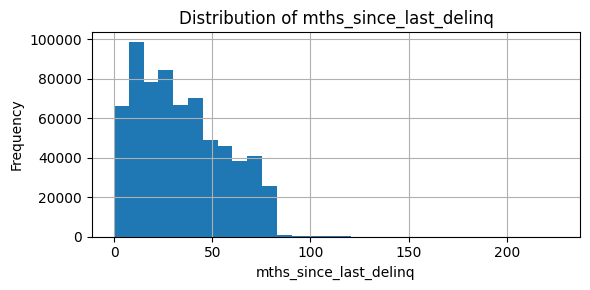

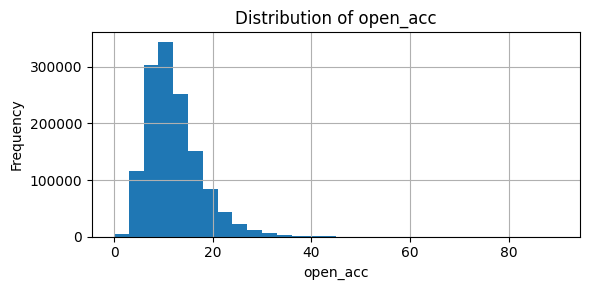

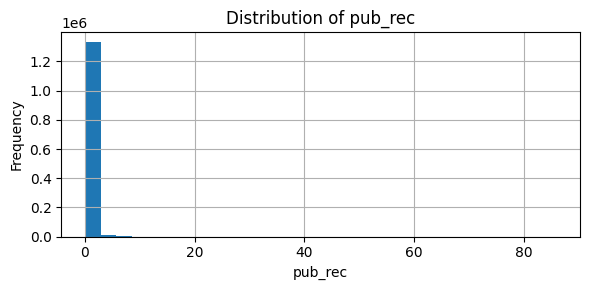

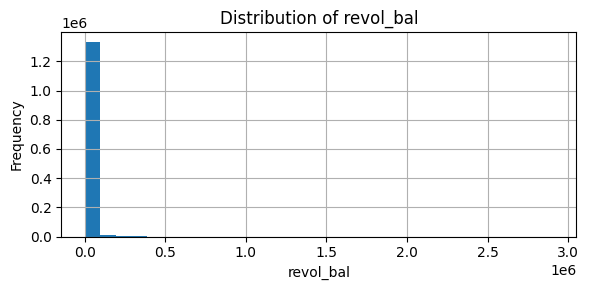

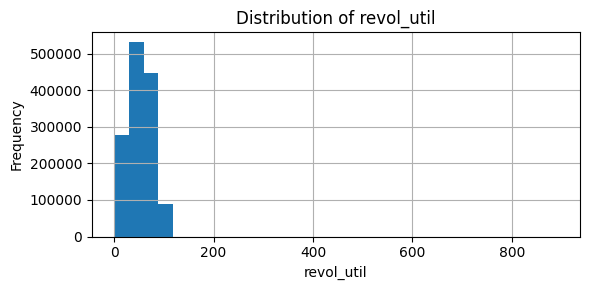

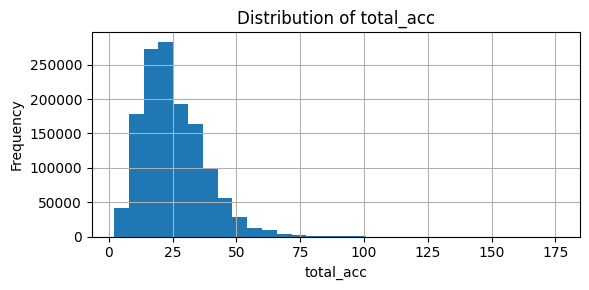

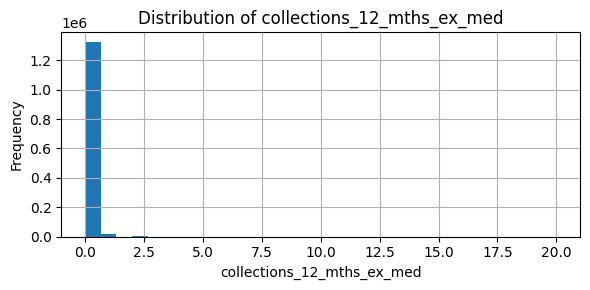

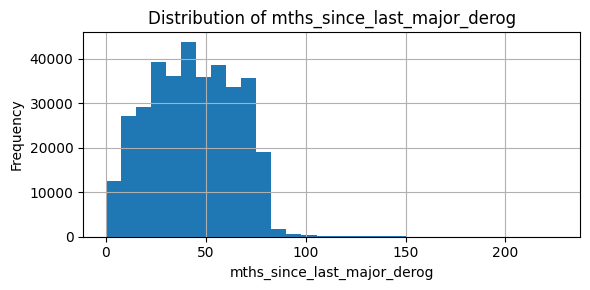

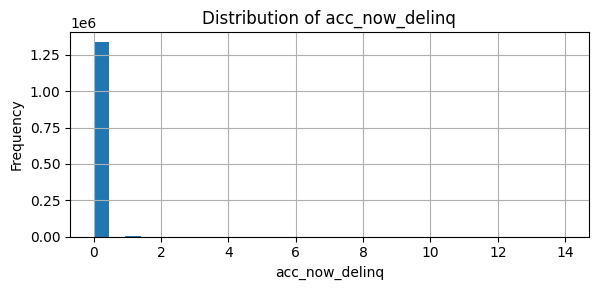

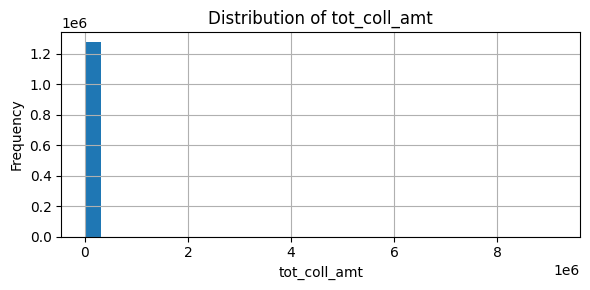

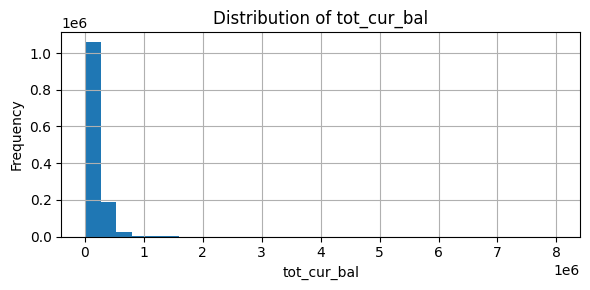

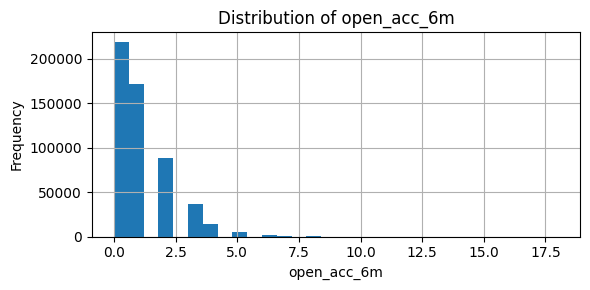

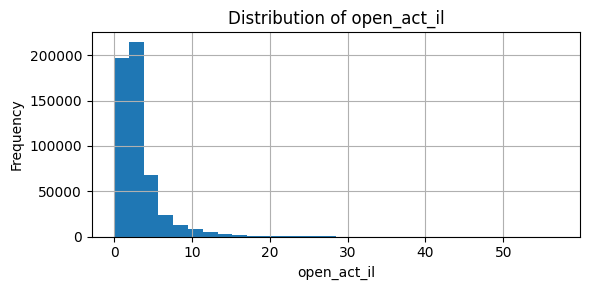

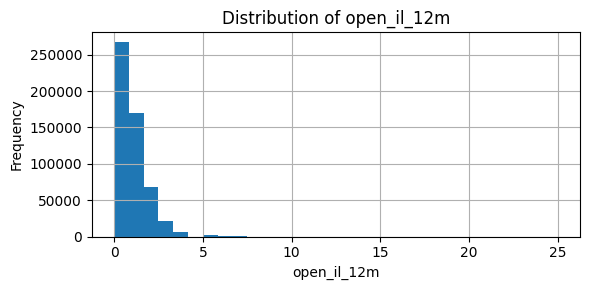

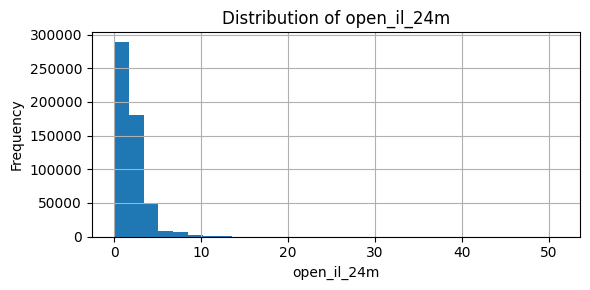

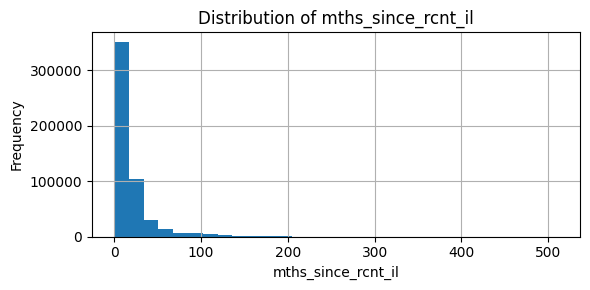

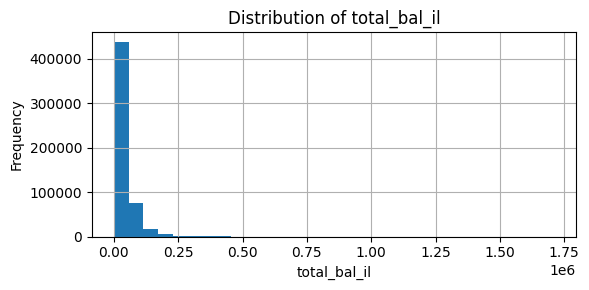

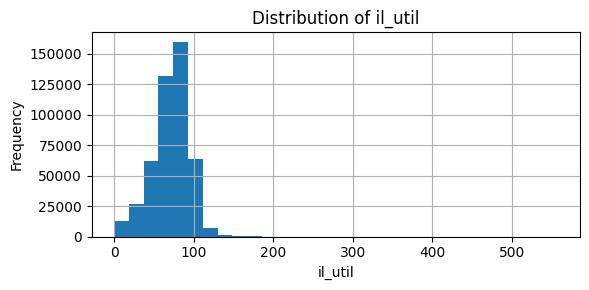

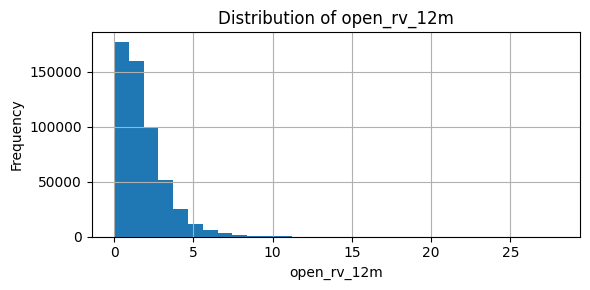

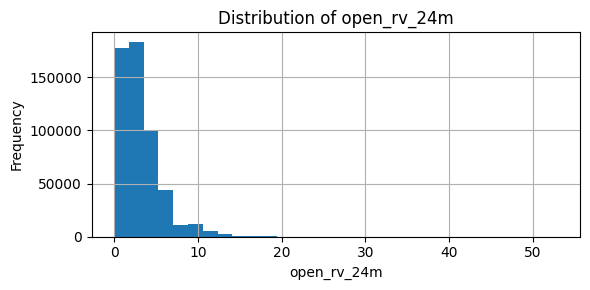

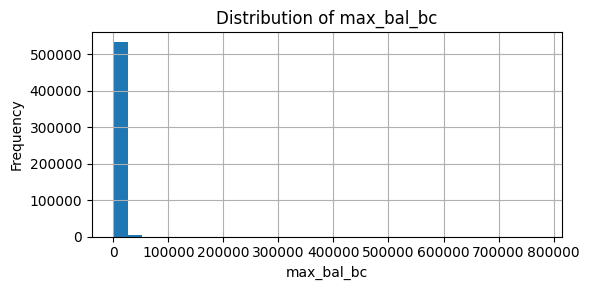

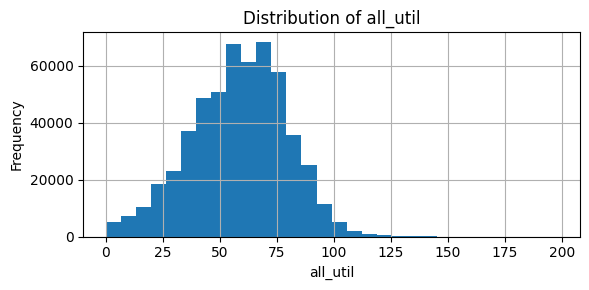

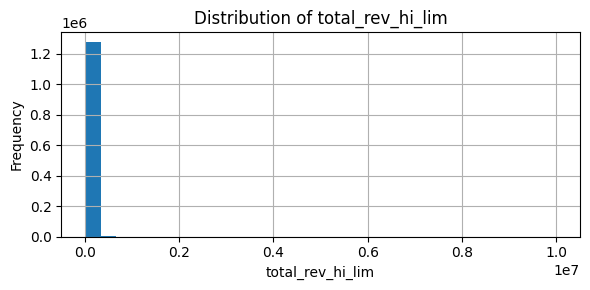

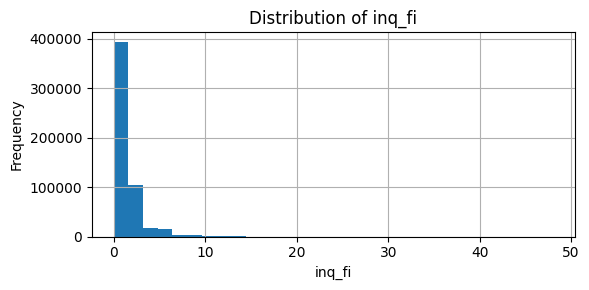

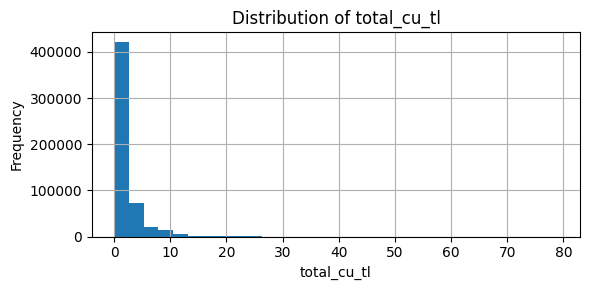

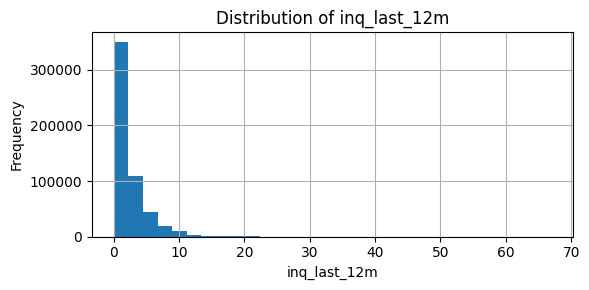

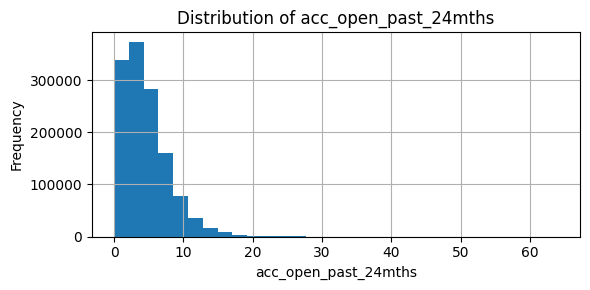

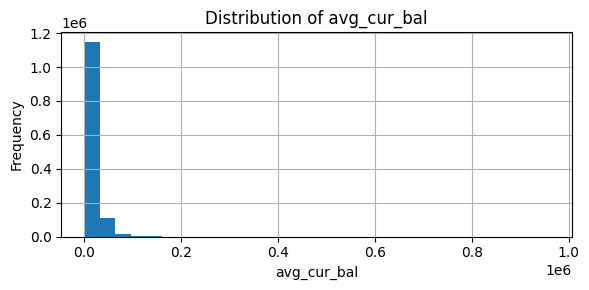

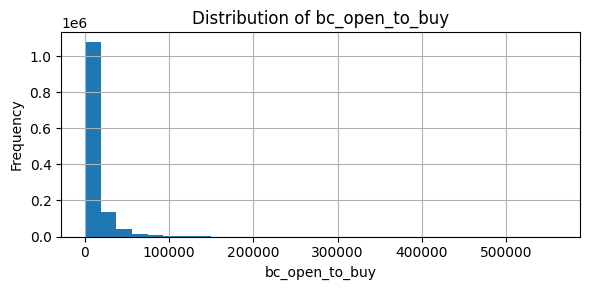

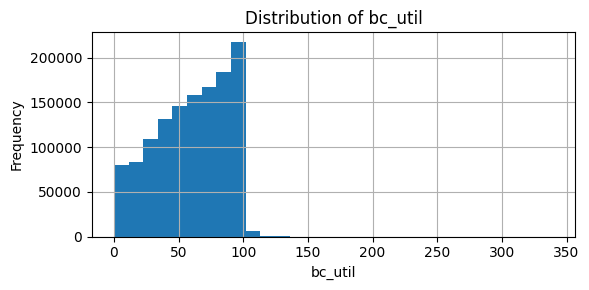

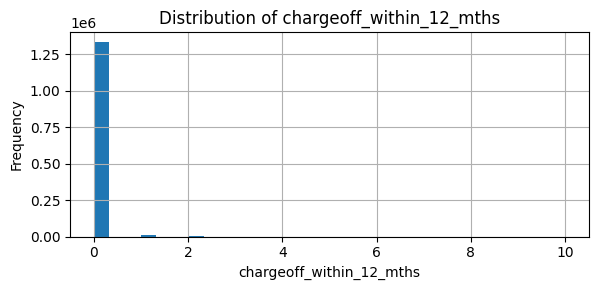

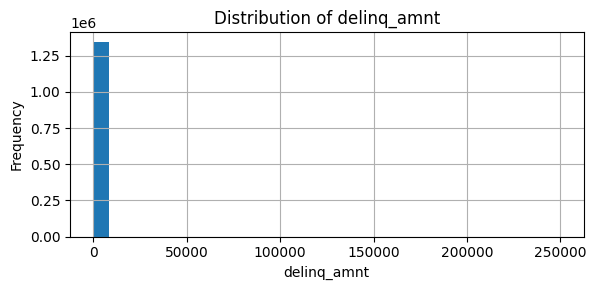

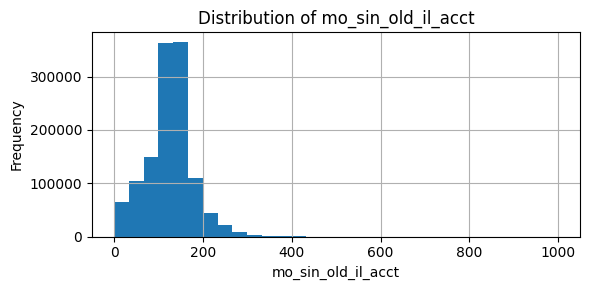

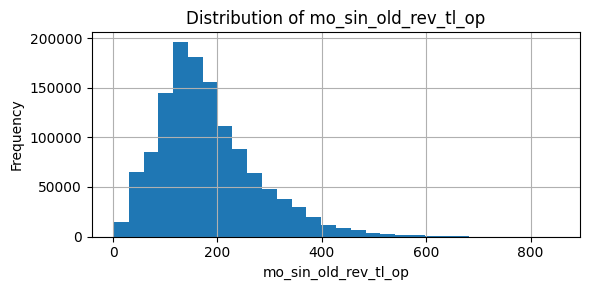

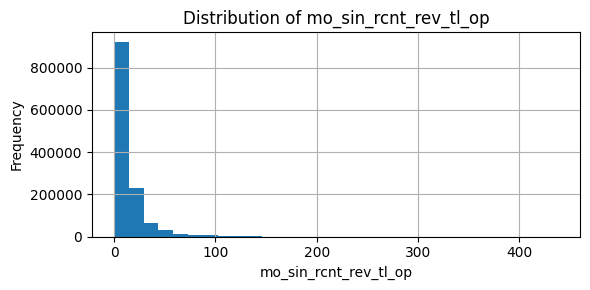

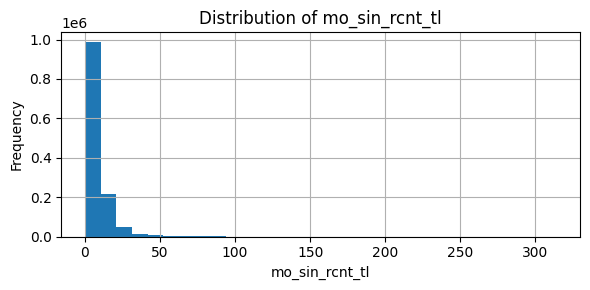

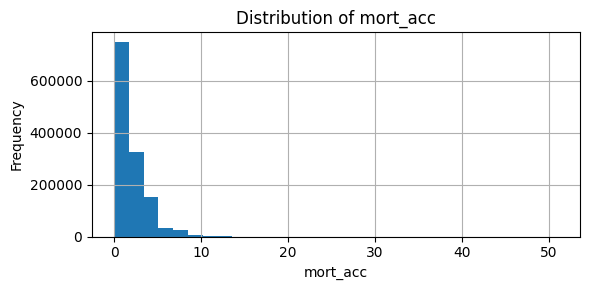

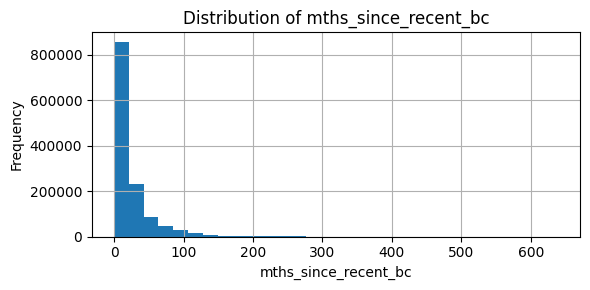

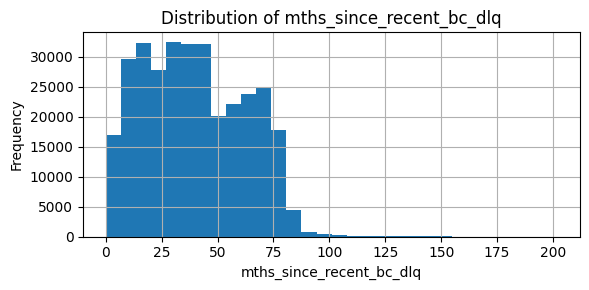

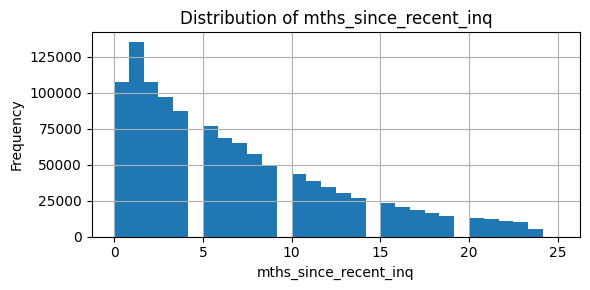

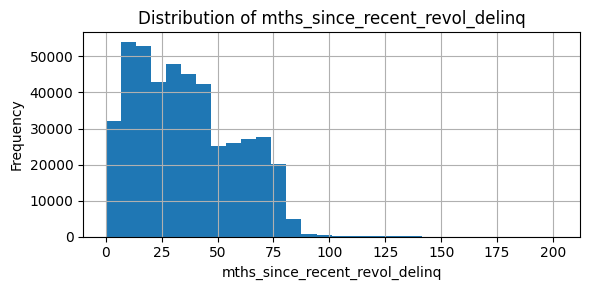

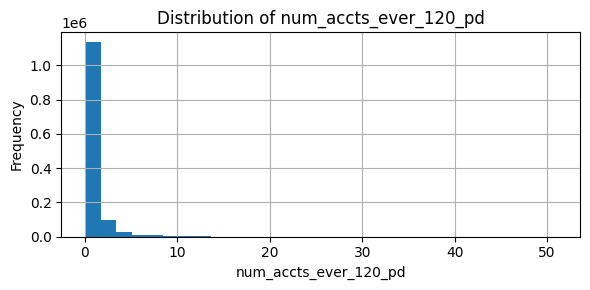

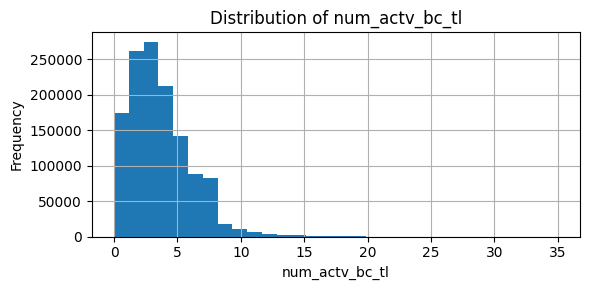

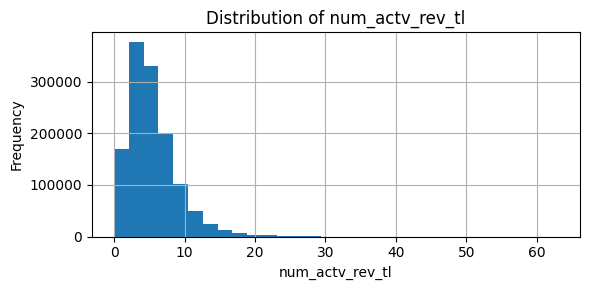

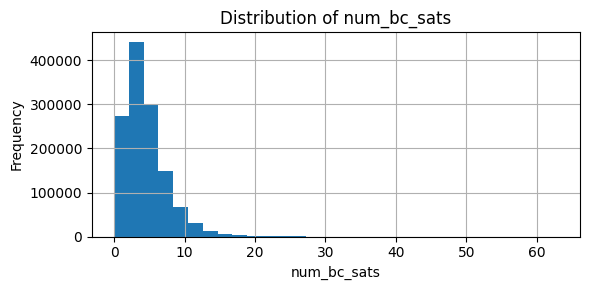

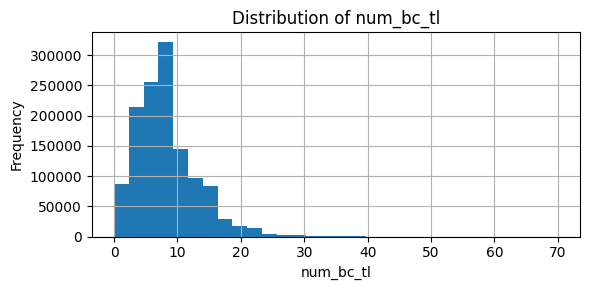

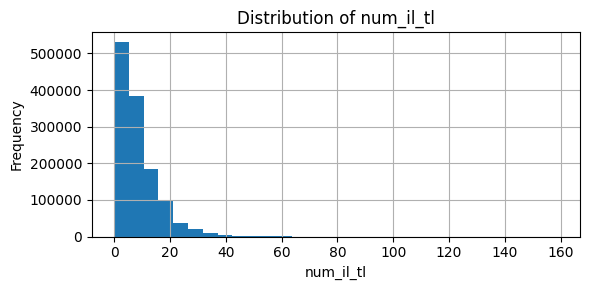

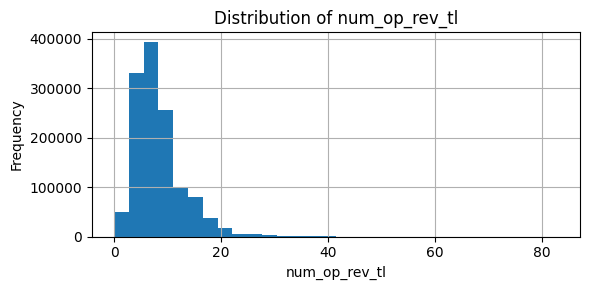

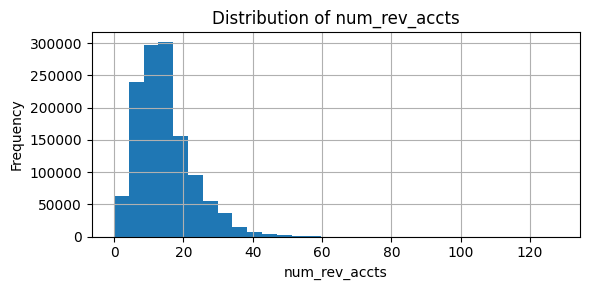

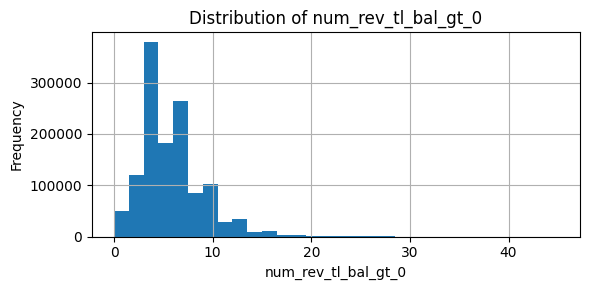

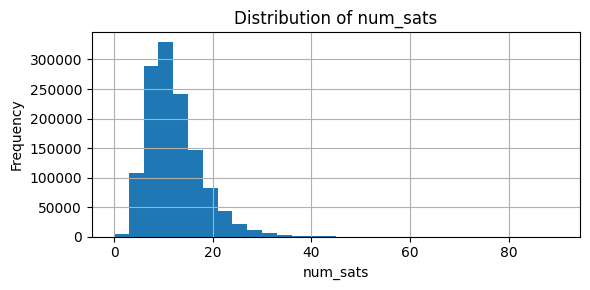

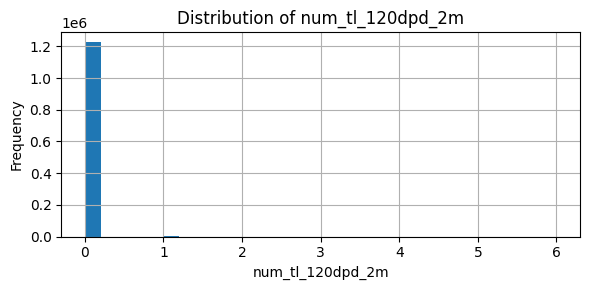

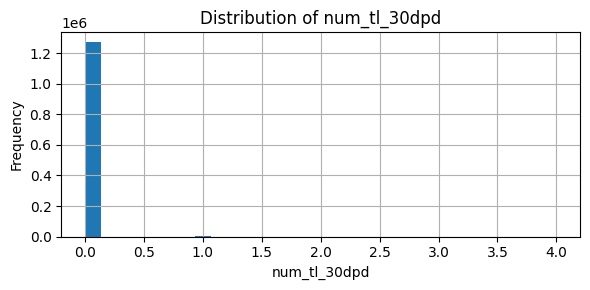

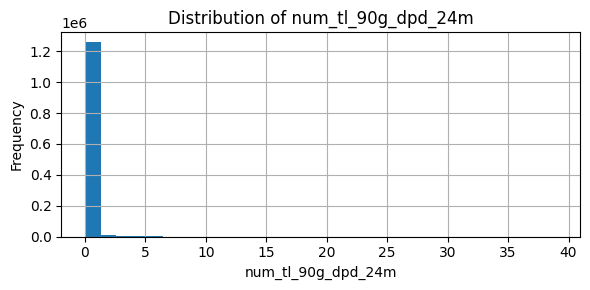

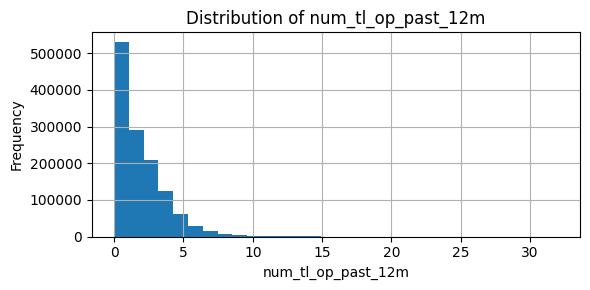

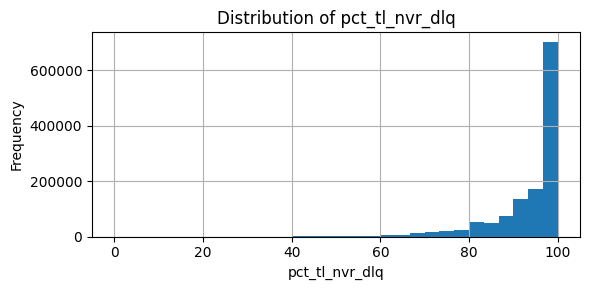

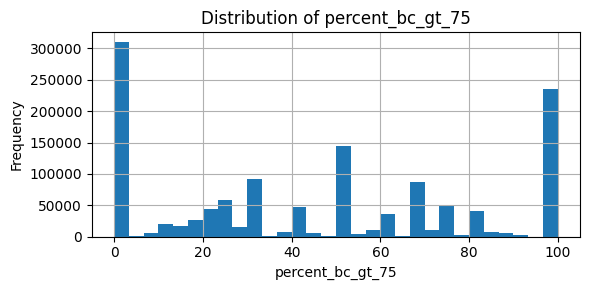

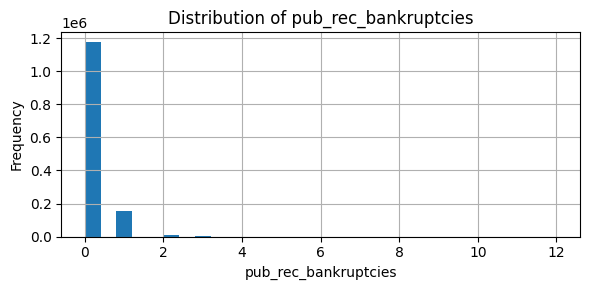

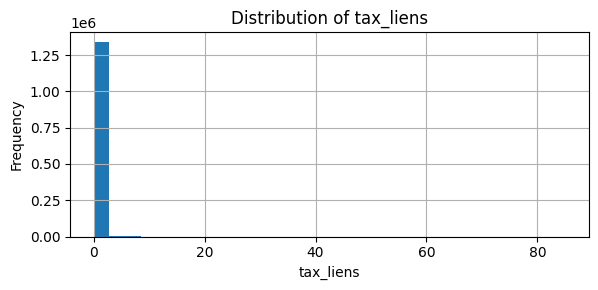

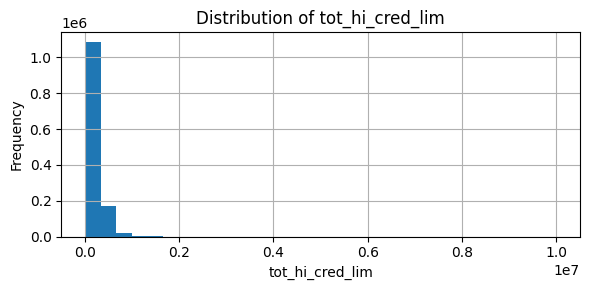

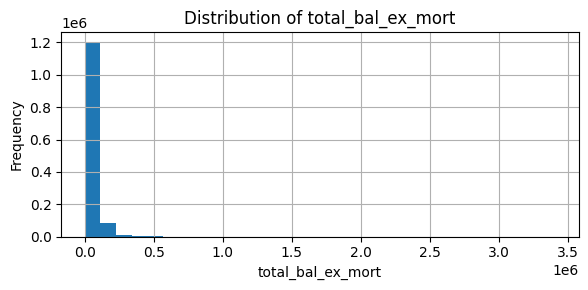

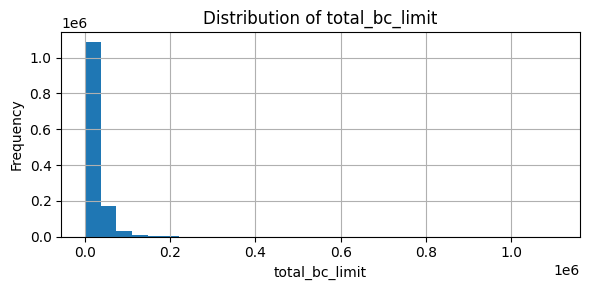

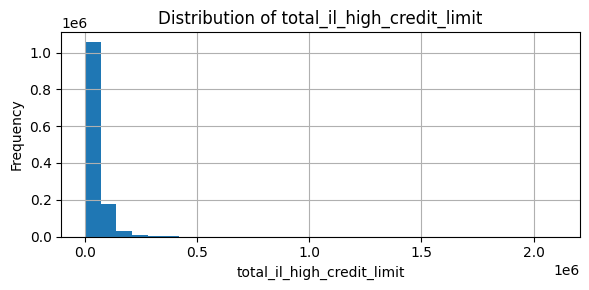

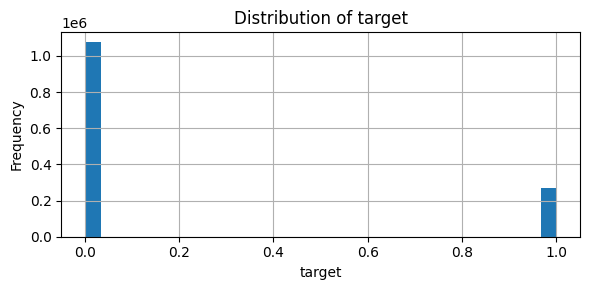

In [32]:
def plot_hist_num(df, cols, bins=30):
    for col in cols:
        plt.figure(figsize=(6, 3))
        df[col].hist(bins=bins)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

plot_hist_num(df, numerical_cols)

Some features are clearly highly correlated and others are having their histogram distorted/skewed by outliers (e.g. annual_inc).

Note that any data issues we identify, such as skewness, outliers etc., we will handle as part of preprocessing.

In [33]:
skewed = df[numerical_cols].skew().sort_values(ascending=False)
print(skewed.head(20))

tot_coll_amt                  666.312700
delinq_amnt                    94.599172
total_rev_hi_lim               51.762854
annual_inc                     46.317938
num_tl_120dpd_2m               45.362212
tax_liens                      32.741579
dti                            27.110581
acc_now_delinq                 21.698559
num_tl_30dpd                   20.934162
chargeoff_within_12_mths       18.080204
collections_12_mths_ex_med     14.931118
revol_bal                      13.749924
num_tl_90g_dpd_24m             13.183364
pub_rec                        11.556255
max_bal_bc                     11.126416
delinq_2yrs                     5.603631
num_accts_ever_120_pd           5.032170
mo_sin_rcnt_tl                  4.438443
total_bal_ex_mort               4.387012
tot_hi_cred_lim                 4.347720
dtype: float64


In [34]:
skewed_col_names = skewed.head(15).index.tolist()
print(skewed_col_names)

['tot_coll_amt', 'delinq_amnt', 'total_rev_hi_lim', 'annual_inc', 'num_tl_120dpd_2m', 'tax_liens', 'dti', 'acc_now_delinq', 'num_tl_30dpd', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'revol_bal', 'num_tl_90g_dpd_24m', 'pub_rec', 'max_bal_bc']


In [35]:
df[skewed_col_names].describe()

tot_coll_amt   delinq_amnt  total_rev_hi_lim    annual_inc  \
count  1.277783e+06  1.345310e+06      1.277783e+06  1.345310e+06   
mean   2.493859e+02  1.489553e+01      3.279094e+04  7.624764e+04   
std    1.106497e+04  8.095251e+02      3.664259e+04  6.992510e+04   
min    0.000000e+00  0.000000e+00      0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00      1.400000e+04  4.578000e+04   
50%    0.000000e+00  0.000000e+00      2.410000e+04  6.500000e+04   
75%    0.000000e+00  0.000000e+00      4.060000e+04  9.000000e+04   
max    9.152545e+06  2.499250e+05      9.999999e+06  1.099920e+07   

       num_tl_120dpd_2m     tax_liens           dti  acc_now_delinq  \
count      1.227909e+06  1.345271e+06  1.344936e+06    1.345310e+06   
mean       8.200933e-04  5.213002e-02  1.828267e+01    5.045677e-03   
std        3.049884e-02  3.979113e-01  1.116045e+01    7.716111e-02   
min        0.000000e+00  0.000000e+00 -1.000000e+00    0.000000e+00   
25%        0.000000e+00  0.000000e+00  1.179000e+01    0.000000e+00   
50%        0.000000e+00  0.000000e+00  1.761000e+01    0.000000e+00   
75%        0.000000e+00  0.000000e+00  2.406000e+01    0.000000e+00   
max        6.000000e+00  8.500000e+01  9.990000e+02    1.400000e+01   

       num_tl_30dpd  chargeoff_within_12_mths  collections_12_mths_ex_med  \
count  1.277783e+06              1.345254e+06                1.345254e+06   
mean   3.418421e-03              9.062229e-03                1.713357e-02   
std    6.234788e-02              1.097191e-01                1.469153e-01   
min    0.000000e+00              0.000000e+00                0.000000e+00   
25%    0.000000e+00              0.000000e+00                0.000000e+00   
50%    0.000000e+00              0.000000e+00                0.000000e+00   
75%    0.000000e+00              0.000000e+00                0.000000e+00   
max    4.000000e+00              1.000000e+01                2.000000e+01   

          revol_bal  num_tl_90g_dpd_24m       pub_rec     max_bal_bc  
count  1.345310e+06        1.277783e+06  1.345310e+06  537598.000000  
mean   1.624811e+04        8.888364e-02  2.152760e-01    5537.703496  
std    2.232817e+04        5.040854e-01  6.018647e-01    5471.949360  
min    0.000000e+00        0.000000e+00  0.000000e+00       0.000000  
25%    5.943000e+03        0.000000e+00  0.000000e+00    2180.000000  
50%    1.113400e+04        0.000000e+00  0.000000e+00    4201.000000  
75%    1.975575e+04        0.000000e+00  0.000000e+00    7198.750000  
max    2.904836e+06        3.900000e+01  8.600000e+01  776843.000000

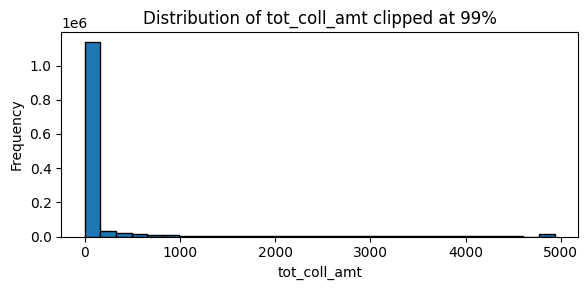

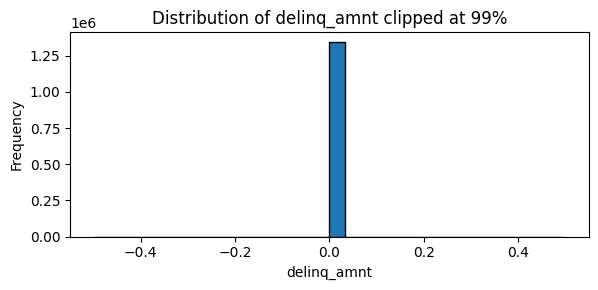

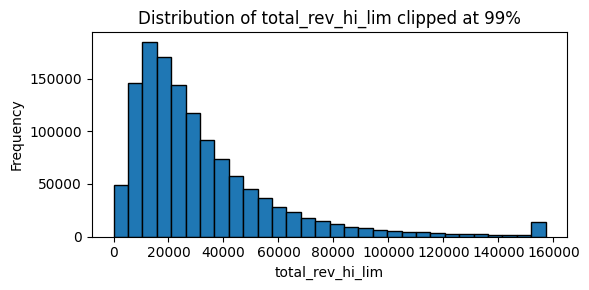

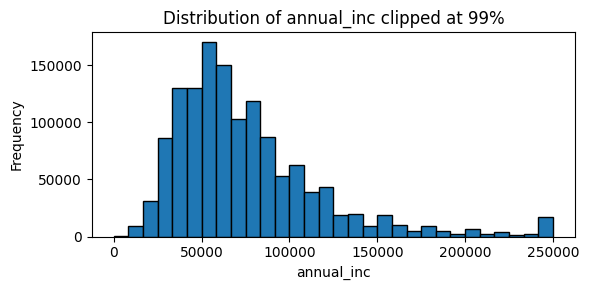

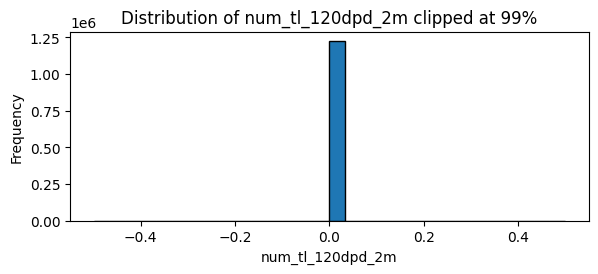

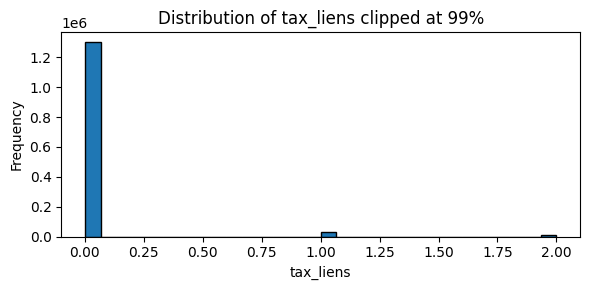

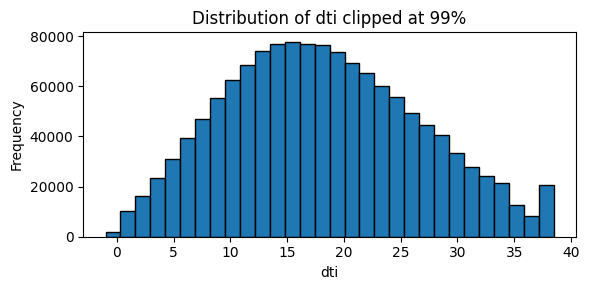

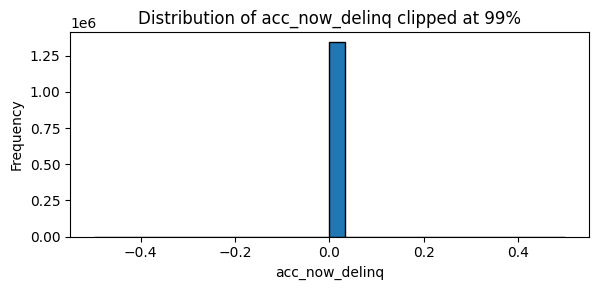

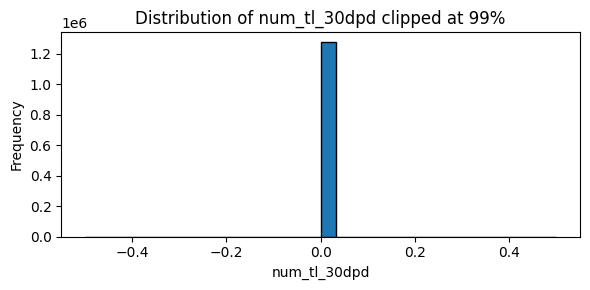

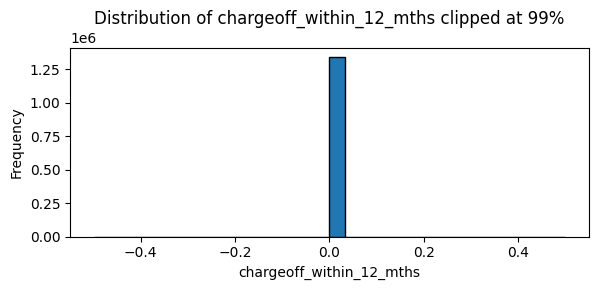

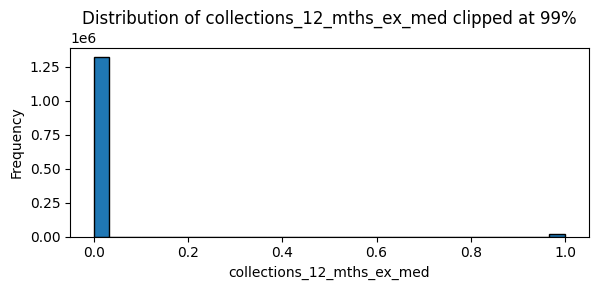

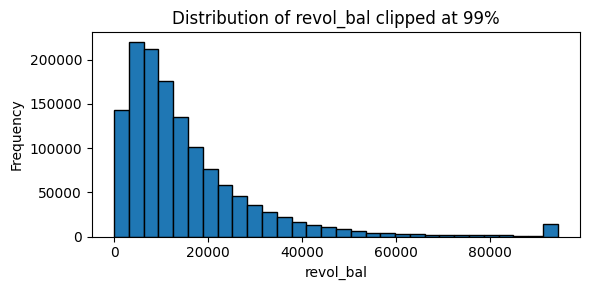

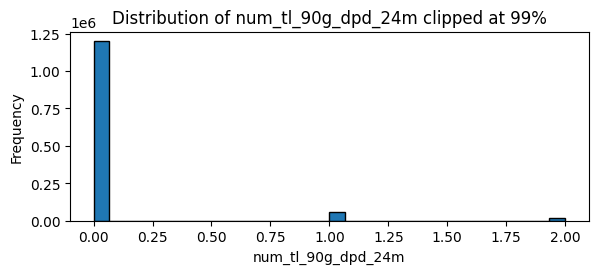

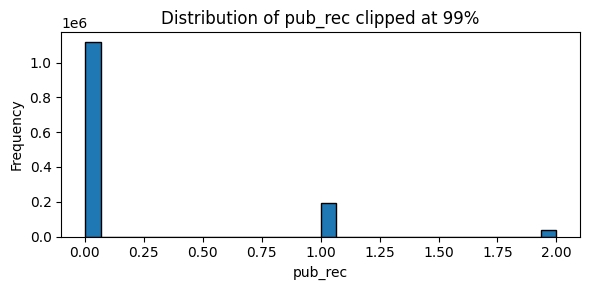

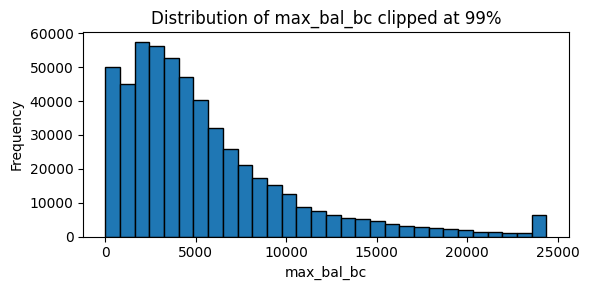

In [36]:
def plot_hist_num_clipped(df, cols, quantile=0.99, bins=30):
    for col in cols:
        clip_val = df[col].quantile(quantile)
        clipped = np.clip(df[col], df[col].min(), clip_val)
        
        plt.figure(figsize=(6, 3))
        plt.hist(clipped, bins=bins, edgecolor='black')
        plt.title(f'Distribution of {col} clipped at {quantile:.0%}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

plot_hist_num_clipped(df,skewed_col_names)

This seems to do a better job of displaying the distribution for some features (e.g. annual_inc, dti, total_rev_hi_lim, revol_bal, max_bal_bc). Others appear to be discrete but are being displayed on a continuous axis.

In [37]:
# Let's try taking logs of all features that have skew > 1.

skewed = df[numerical_cols].skew().sort_values(ascending=False)
high_skew = skewed[skewed > 1]

In [38]:
improved_log_cols = []

def check_log_corr(skew_list=[]):

    log_cols = []
    log_cols_to_drop = []

    for col in skew_list.index.tolist():
        if (df[col] >= 0).all():
            df[f'log_{col}'] = np.log1p(df[col])
            log_cols.append(f'log_{col}')

            original_corr = abs(df[col].corr(df['target'])).round(3)
            log_corr = abs(df[f'log_{col}'].corr(df['target'])).round(3)

            if log_corr > original_corr:
                print(f"Correlation of feature {col} with target improved from {original_corr} to {log_corr}")
                print(f"Original skew of feature: {skewed[col].round(3)}")
                print()
                improved_log_cols.append(col)

            else:
                log_cols_to_drop.append(f'log_{col}')

    df.drop(log_cols_to_drop, axis=1, inplace=True)
    print(improved_log_cols)

check_log_corr(high_skew)

Correlation of feature delinq_amnt with target improved from 0.003 to 0.006
Original skew of feature: 94.599

Correlation of feature annual_inc with target improved from 0.042 to 0.063
Original skew of feature: 46.318

Correlation of feature pub_rec with target improved from 0.026 to 0.031
Original skew of feature: 11.556

Correlation of feature delinq_2yrs with target improved from 0.019 to 0.021
Original skew of feature: 5.604

Correlation of feature installment with target improved from 0.052 to 0.062
Original skew of feature: 1.007

['delinq_amnt', 'annual_inc', 'pub_rec', 'delinq_2yrs', 'installment']


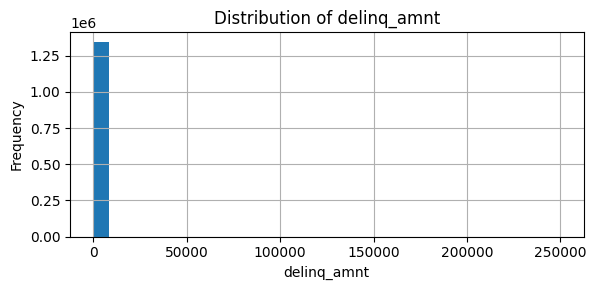

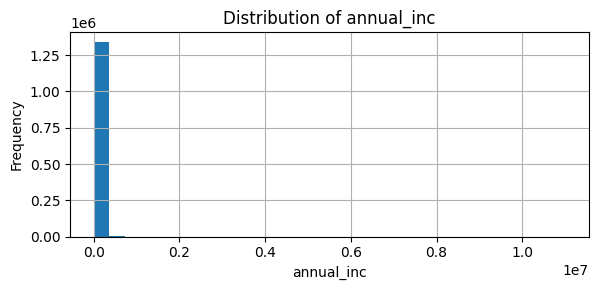

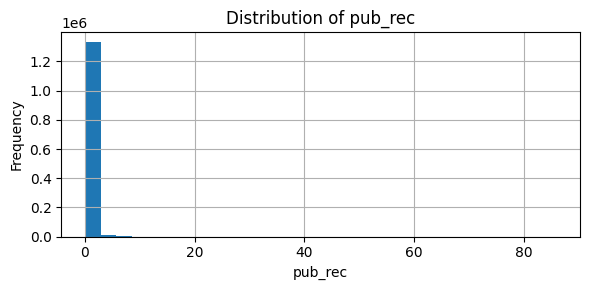

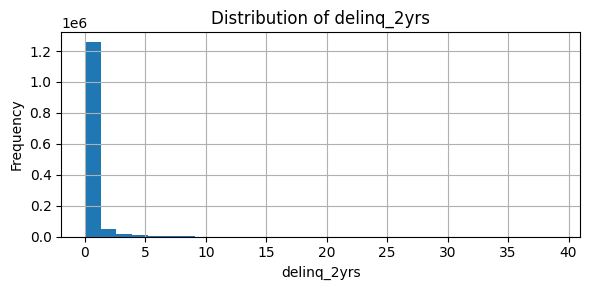

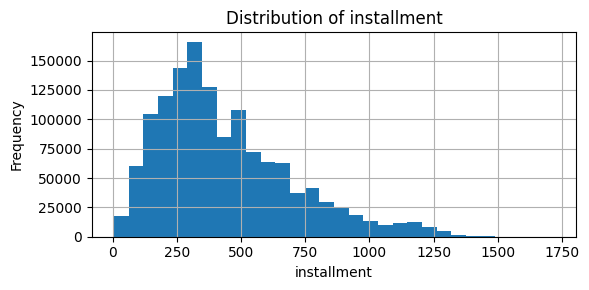

In [39]:
plot_hist_num(df, improved_log_cols)

Correlations of annual_inc, installment and pub_rec seem to meaningfully improve by taking logs. We will revisit this when analyse features vs target. Given installment improved meaningfully despite having only 1.007 skew originally, it is worth looking at the other columns with skew below 1 as well.

In [40]:
low_skew = skewed[skewed <= 1]
check_log_corr(low_skew)

Correlation of feature total_acc with target improved from 0.011 to 0.015
Original skew of feature: 0.957

Correlation of feature loan_amnt with target improved from 0.066 to 0.07
Original skew of feature: 0.782

['delinq_amnt', 'annual_inc', 'pub_rec', 'delinq_2yrs', 'installment', 'total_acc', 'loan_amnt']


From this we can see that taking logs of loan_amnt has resulted in a small increase in the correlation with the target. Again, we may revisit this later.

We can see that none of the columns we intended to drop earlier from the null % and zero ratio sections have seen any meaningful changes. Therefore we won't go back and change these sections.

### Categorical Features - Distribution Analysis

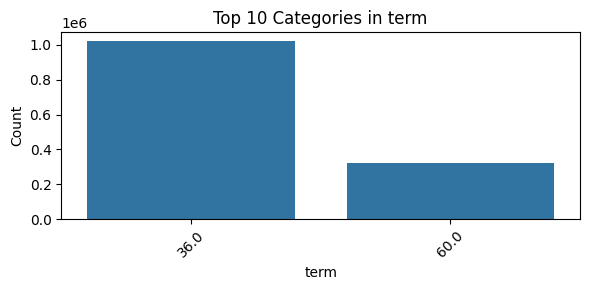

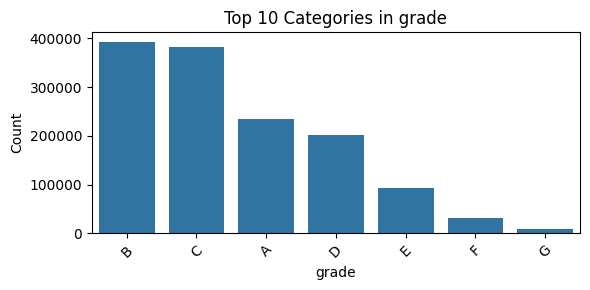

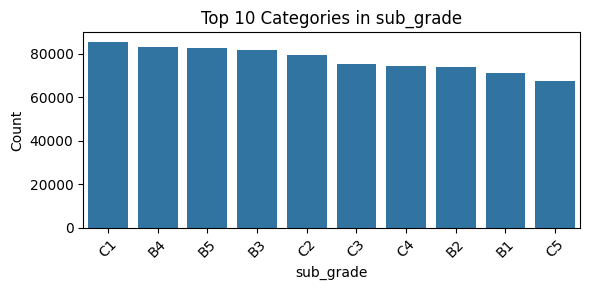

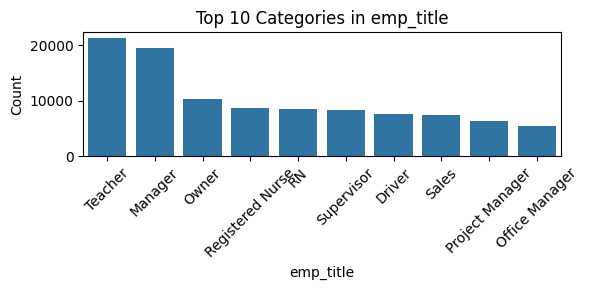

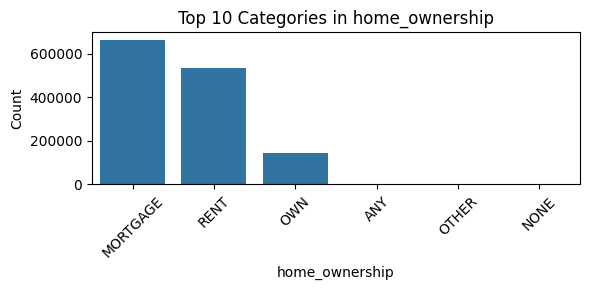

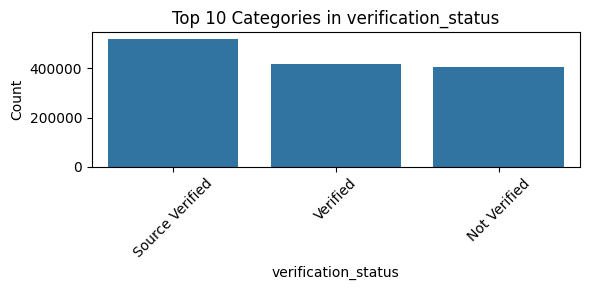

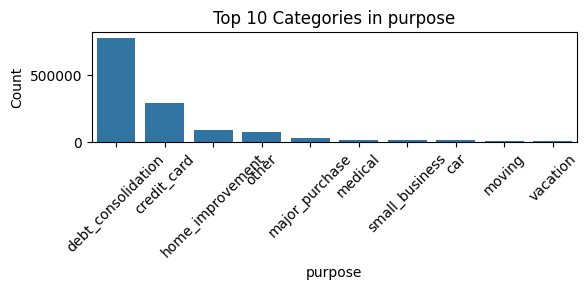

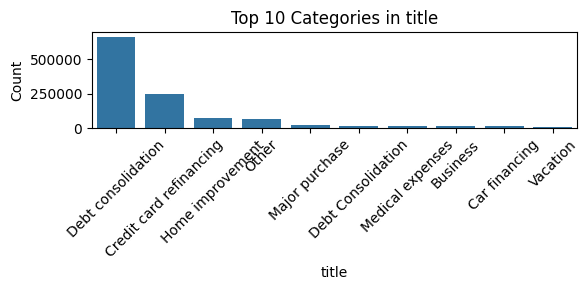

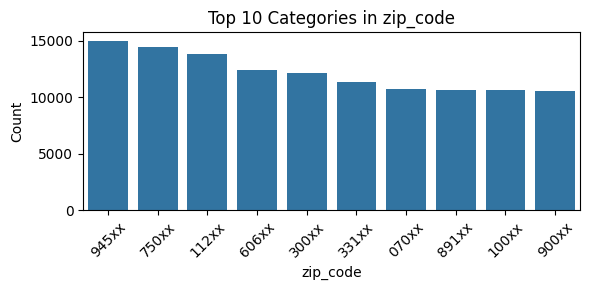

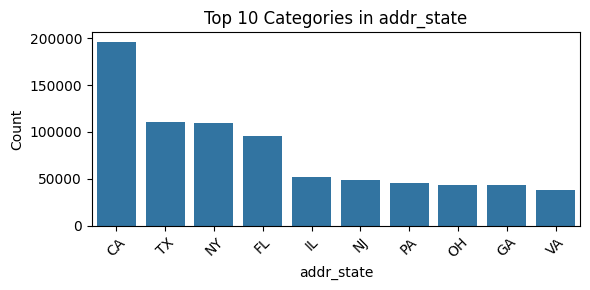

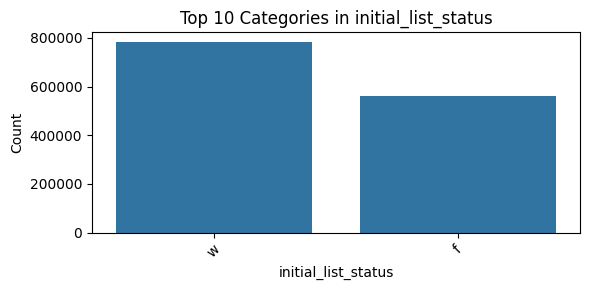

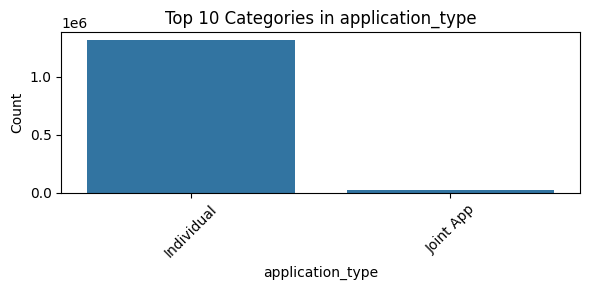

In [41]:
def plot_bar_cat(df, cols, top_n=10):
    for col in cols:
        plt.figure(figsize=(6, 3))
        value_counts = df[col].value_counts().head(top_n)
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Top {top_n} Categories in {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_bar_cat(df, categorical_cols)

### Categorical Features - Unique Values

For this, we will use some of the information from the earlier bar charts of the categorical features. Namely, we may consider:

- All values of 'emp_title' are reasonably infrequent - this makes sense as it's a free text field
- URLs are unique, and hence provide no valuable information
- 'home_ownership', 'purpose' and 'title' look like they may all benefit from the addition of an 'other' category to group multiple, less frequent categories
- There are few cases of joint applications when compared to individual applications

among other things.

In [42]:
df[categorical_cols].head()

term grade sub_grade             emp_title home_ownership  \
0  36.0     C        C4               leadman       MORTGAGE   
1  36.0     C        C1              Engineer       MORTGAGE   
2  60.0     B        B4          truck driver       MORTGAGE   
3  60.0     F        F1   Contract Specialist       MORTGAGE   
4  36.0     C        C3  Veterinary Tecnician           RENT   

  verification_status             purpose               title zip_code  \
0        Not Verified  debt_consolidation  Debt consolidation    190xx   
1        Not Verified      small_business            Business    577xx   
2        Not Verified    home_improvement                 NaN    605xx   
3     Source Verified      major_purchase      Major purchase    174xx   
4     Source Verified  debt_consolidation  Debt consolidation    300xx   

  addr_state initial_list_status application_type  
0         PA                   w       Individual  
1         SD                   w       Individual  
2         IL                   w        Joint App  
3         PA                   w       Individual  
4         GA                   w       Individual

In [43]:
# Note that 'zip_code' could have some value, and we could extract the first 3 characters and keep it. However, it is fairly redundant since
# we already have 'addr_state', and each zip code is fairly infrequent in the dataset as a whole. Hence, we will drop it.
redundant_cols_to_drop = ['zip_code']

In [44]:
df[categorical_cols].nunique().sort_values(ascending=False)

emp_title              378353
title                   61681
zip_code                  943
addr_state                 51
sub_grade                  35
purpose                    14
grade                       7
home_ownership              6
verification_status         3
term                        2
initial_list_status         2
application_type            2
dtype: int64

In [45]:
print(df['emp_title'].value_counts().head(5))
print()
print(df['title'].value_counts().head(5))

emp_title
Teacher             21268
Manager             19470
Owner               10302
Registered Nurse     8774
RN                   8522
Name: count, dtype: int64

title
Debt consolidation         660960
Credit card refinancing    249910
Home improvement            75073
Other                       66778
Major purchase              24045
Name: count, dtype: int64


In [46]:
# The 'emp_title' feature is a free text field with many unique values. It is somewhat redundant as related features such as income will be far more important. We will drop it.
# The 'title' feature is a free text field, and it is made largely redundant by the 'purpose' feature, so let's drop it too.
# We can also drop 'grade' as it is made redundant by 'sub_grade', which contains more information. We will use ordinal encoding to convert 'sub_grade' into a numeric format in preprocessing.
redundant_cols_to_drop.extend(['emp_title','title','grade'])

### Categorical Features - Grouping

In [47]:
df[categorical_cols].head()

term grade sub_grade             emp_title home_ownership  \
0  36.0     C        C4               leadman       MORTGAGE   
1  36.0     C        C1              Engineer       MORTGAGE   
2  60.0     B        B4          truck driver       MORTGAGE   
3  60.0     F        F1   Contract Specialist       MORTGAGE   
4  36.0     C        C3  Veterinary Tecnician           RENT   

  verification_status             purpose               title zip_code  \
0        Not Verified  debt_consolidation  Debt consolidation    190xx   
1        Not Verified      small_business            Business    577xx   
2        Not Verified    home_improvement                 NaN    605xx   
3     Source Verified      major_purchase      Major purchase    174xx   
4     Source Verified  debt_consolidation  Debt consolidation    300xx   

  addr_state initial_list_status application_type  
0         PA                   w       Individual  
1         SD                   w       Individual  
2         IL                   w        Joint App  
3         PA                   w       Individual  
4         GA                   w       Individual

In [48]:
# The only categorical variables that may benefit from grouping are 'addr_state', 'purpose' and 'home_ownership', so let's investigate these.
print(df['addr_state'].value_counts(ascending=True).head(10))
print()
# We could group these, but IA is the only one that has so few data points that it may cause overfitting. Let's check it for only positive cases.
print(df[df['target'] == 1]['addr_state'].value_counts(ascending=True).head(10))
# Our model may overfit in the IA case, but for now we are going to leave it as it is.

addr_state
IA       7
ND    1602
ID    1689
ME    2030
VT    2652
SD    2767
WY    2922
AK    3190
DC    3475
NE    3586
Name: count, dtype: int64

addr_state
IA      1
ME    281
ID    318
ND    328
VT    370
DC    459
WY    490
SD    590
AK    627
MT    645
Name: count, dtype: int64


In [49]:
print(df['purpose'].value_counts(ascending=True).head(10))
print()
print(df[df['target'] == 1]['purpose'].value_counts(ascending=True).head(10))
# Again, we will leave ungrouped for now.

purpose
educational           326
renewable_energy      933
wedding              2294
house                7253
vacation             9065
moving               9480
car                 14585
small_business      15416
medical             15554
major_purchase      29425
Name: count, dtype: int64

purpose
educational           56
renewable_energy     221
wedding              279
house               1587
vacation            1738
car                 2141
moving              2214
medical             3387
small_business      4580
major_purchase      5473
Name: count, dtype: int64


In [50]:
print(df['home_ownership'].value_counts(ascending=True).head(10))
print()
print(df[df['target'] == 1]['home_ownership'].value_counts(ascending=True).head(10))

home_ownership
NONE            48
OTHER          144
ANY            286
OWN         144832
RENT        534421
MORTGAGE    665579
Name: count, dtype: int64

home_ownership
NONE             7
OTHER           27
ANY             56
OWN          29864
MORTGAGE    114531
RENT        124074
Name: count, dtype: int64


We will group 'ANY', 'OTHER' and 'NONE' into one 'Other (Grouped)' category as part of preprocessing.

In [51]:
df['application_type'].value_counts(normalize=True)

application_type
Individual    0.980822
Joint App     0.019178
Name: proportion, dtype: float64

In [52]:
# Let's explore if the two application types have meaningfully different distributions.
df.groupby('application_type')[['target','annual_inc','dti','loan_amnt']].mean()

target    annual_inc        dti     loan_amnt
application_type                                                 
Individual        0.198721  76609.930724  18.015555  14330.596547
Joint App         0.245891  57718.529247  32.144755  18990.972868

## Analysing Features vs Target Variable

### Numerical Features

In [53]:
numerical_cols = df.select_dtypes(include=['number', 'bool']).columns.tolist()
df[numerical_cols].head()

loan_amnt  int_rate  installment  emp_length  annual_inc    dti  \
0     3600.0     13.99       123.03        10.0     55000.0   5.91   
1    24700.0     11.99       820.28        10.0     65000.0  16.06   
2    20000.0     10.78       432.66        10.0     63000.0  10.78   
3    10400.0     22.45       289.91         3.0    104433.0  25.37   
4    11950.0     13.44       405.18         4.0     34000.0  10.20   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0          0.0           675.0            679.0             1.0   
1          1.0           715.0            719.0             4.0   
2          0.0           695.0            699.0             0.0   
3          1.0           695.0            699.0             3.0   
4          0.0           690.0            694.0             0.0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                    30.0       7.0      0.0     2765.0        29.7   
1                     6.0      22.0      0.0    21470.0        19.2   
2                     NaN       6.0      0.0     7869.0        56.2   
3                    12.0      12.0      0.0    21929.0        64.5   
4                     NaN       5.0      0.0     8822.0        68.4   

   total_acc  collections_12_mths_ex_med  mths_since_last_major_derog  \
0       13.0                         0.0                         30.0   
1       38.0                         0.0                          NaN   
2       18.0                         0.0                          NaN   
3       35.0                         0.0                          NaN   
4        6.0                         0.0                          NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  \
0             0.0         722.0     144904.0          2.0          2.0   
1             0.0           0.0     204396.0          1.0          1.0   
2             0.0           0.0     189699.0          0.0          1.0   
3             0.0           0.0     331730.0          1.0          3.0   
4             0.0           0.0      12798.0          0.0          1.0   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          0.0          1.0                21.0        4981.0     36.0   
1          0.0          1.0                19.0       18005.0     73.0   
2          0.0          4.0                19.0       10827.0     73.0   
3          0.0          3.0                14.0       73839.0     84.0   
4          0.0          0.0               338.0        3976.0     99.0   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          3.0          3.0       722.0      34.0            9300.0     3.0   
1          2.0          3.0      6472.0      29.0          111800.0     0.0   
2          0.0          2.0      2081.0      65.0           14000.0     2.0   
3          4.0          7.0      9702.0      78.0           34000.0     2.0   
4          0.0          0.0      4522.0      76.0           12900.0     0.0   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          1.0           4.0                   4.0      20701.0   
1          0.0           6.0                   4.0       9733.0   
2          5.0           1.0                   6.0      31617.0   
3          1.0           3.0                  10.0      27644.0   
4          0.0           0.0                   0.0       2560.0   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0          1506.0     37.2                       0.0          0.0   
1         57830.0     27.1                       0.0          0.0   
2          2737.0     55.9                       0.0          0.0   
3          4567.0     77.5                       0.0          0.0   
4           844.0     91.0                       0.0          0.0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0               148.0                 128.0                 

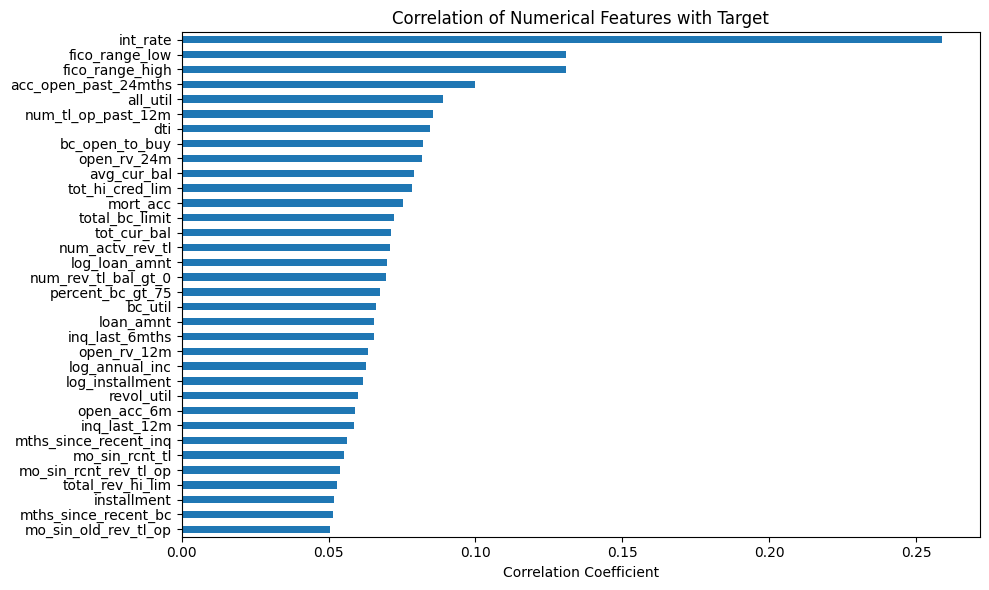

In [54]:
correlations = df[numerical_cols].corr()['target'].drop('target')
strong_correlations = correlations[correlations.abs() > 0.05]
correlations_sorted = strong_correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations_sorted.plot(kind='barh')
plt.title("Correlation of Numerical Features with Target")
plt.xlabel("Correlation Coefficient")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Interest Rate')

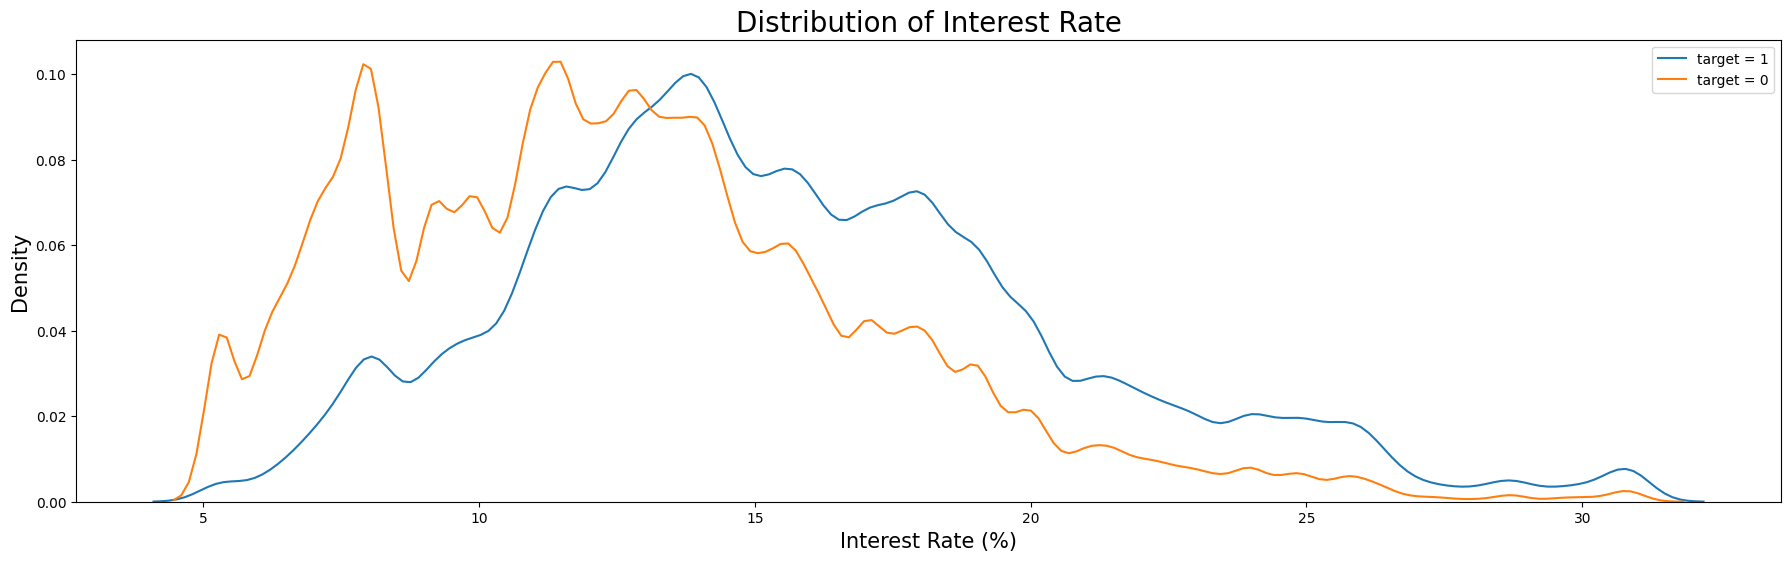

In [55]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['target'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['target'] == 0, 'int_rate'], label = 'target = 0')
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.legend()
plt.title('Distribution of Interest Rate',fontsize=20)

I was expecting loan_amnt and annual_inc to have a stronger correlation. Note that dti (which excludes any mortgages and the requested loan amount) has a fairly strong correlation. Perhaps we should consider the loan size relative to annual income of the loan itself, and also explore total dti which includes the new requested loan amount.

-0.00028073674121153206


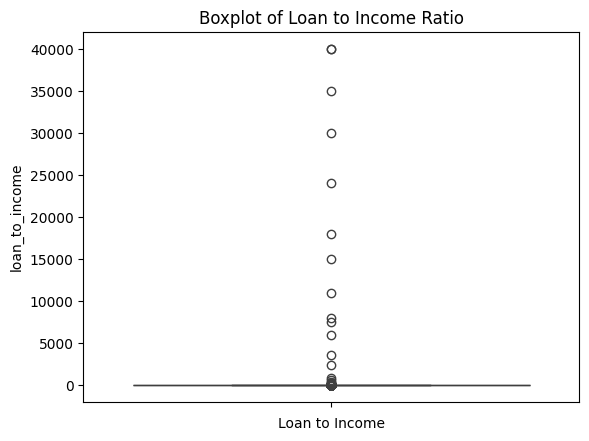

In [56]:
df['loan_to_income'] = df['loan_amnt'] / df['annual_inc']
df.loc[df['annual_inc'] == 0, 'loan_to_income'] = np.nan

print(df['loan_to_income'].corr(df['target']))

sns.boxplot(y=df['loan_to_income'])
plt.title('Boxplot of Loan to Income Ratio')
plt.xlabel('Loan to Income')
plt.show()

0.13723747999497762


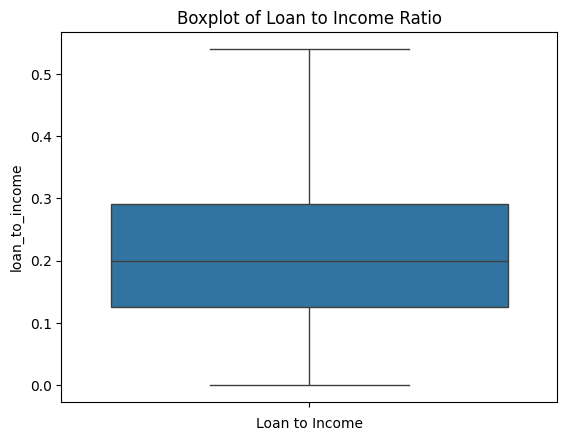

In [57]:
# The correlation is atrocious, but removing the outliers gives a much better answer.
print(df[df['loan_to_income'] < df['loan_to_income'].quantile(0.99)]['loan_to_income'].corr(df['target']))

sns.boxplot(y=df['loan_to_income'], showfliers=False)
plt.title('Boxplot of Loan to Income Ratio')
plt.xlabel('Loan to Income')
plt.show()

0.10551823366136634


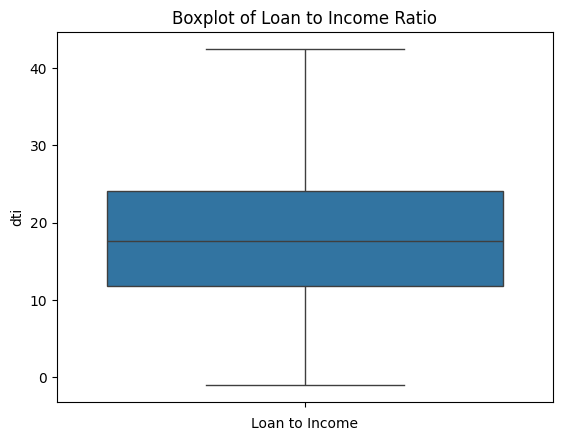

In [58]:
# Similarly for dti, the correlation with the target improves.
print(df[df['dti'] < df['dti'].quantile(0.99)]['dti'].corr(df['target']))

sns.boxplot(y=df['dti'], showfliers=False)
plt.title('Boxplot of Loan to Income Ratio')
plt.xlabel('Loan to Income')
plt.show()

We will revisit this later as part of Feature Engineering.

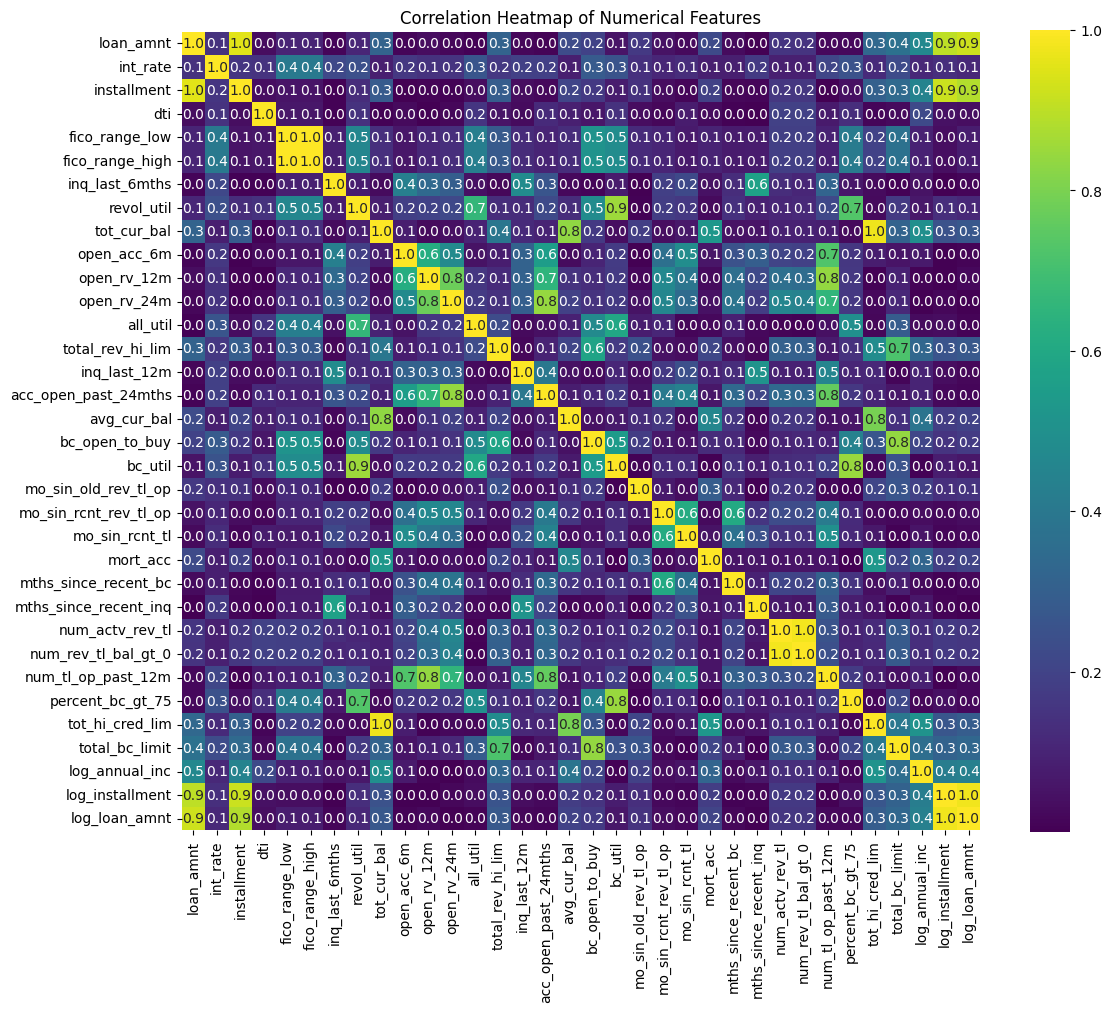

In [59]:
strong_corr_matrix = df[strong_correlations.index.tolist()].corr().abs()


plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(
    strong_corr_matrix,
    cmap='viridis',
    annot=True,        # Change to True to show values
    fmt=".1f",
    square=True,
)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [60]:
strong_features = strong_correlations.index.tolist()

def find_feature_relationships(df, numerical_cols, strong_features, target_col='target', threshold=0.7):

    corr_matrix = df[numerical_cols].corr().abs()
    target_corr = df[numerical_cols].corr()[target_col].drop(target_col)

    results = []

    for feat in strong_features:
        if feat not in corr_matrix.index:
            continue
        correlated_feats = (
            corr_matrix.loc[feat]
            .drop(feat)
            .loc[lambda x: x >= threshold]
            .index
            .tolist()
        )

        if correlated_feats:
            results.append({
                'feature': feat,
                'correlation_with_target': abs(target_corr[feat]).round(3),
                'highly_correlated_with': correlated_feats
            })
    
    results_df=pd.DataFrame(results)
    results_df = results_df.sort_values(by='correlation_with_target', ascending=False).reset_index(drop=True)

    return results_df

find_feature_relationships(df=df,numerical_cols=numerical_cols,strong_features=strong_features,threshold=0.9)

feature  correlation_with_target  \
0       fico_range_low                    0.131   
1      fico_range_high                    0.131   
2      tot_hi_cred_lim                    0.078   
3          tot_cur_bal                    0.071   
4      num_actv_rev_tl                    0.071   
5        log_loan_amnt                    0.070   
6  num_rev_tl_bal_gt_0                    0.069   
7            loan_amnt                    0.066   
8      log_installment                    0.062   
9          installment                    0.052   

                          highly_correlated_with  
0                              [fico_range_high]  
1                               [fico_range_low]  
2                                  [tot_cur_bal]  
3                              [tot_hi_cred_lim]  
4                          [num_rev_tl_bal_gt_0]  
5                   [loan_amnt, log_installment]  
6                              [num_actv_rev_tl]  
7  [installment, log_installment, log_loan_amnt]  
8        [loan_amnt, installment, log_loan_amnt]  
9                   [loan_amnt, log_installment]

We probably want to be dropping some of these features that have very high correlations with other features.

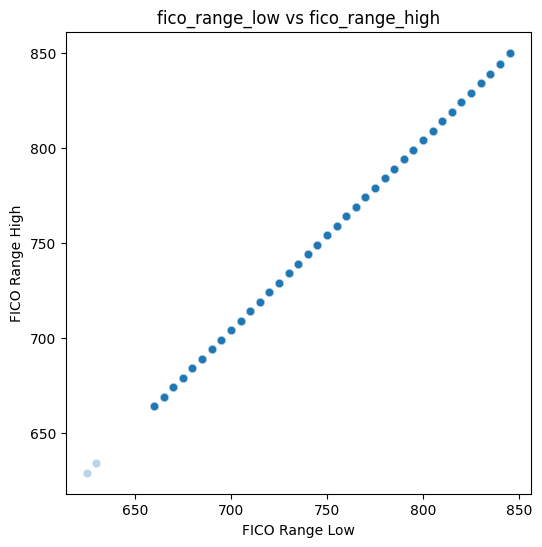

In [61]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='fico_range_low', y='fico_range_high', data=df, alpha=0.3)
plt.xlabel('FICO Range Low')
plt.ylabel('FICO Range High')
plt.title('fico_range_low vs fico_range_high')
plt.show()

These are quite clearly almost perfectly correlated, so we can drop one later on. Alternatively, a better solution might be to engineer an average fico rating feature and drop these two.

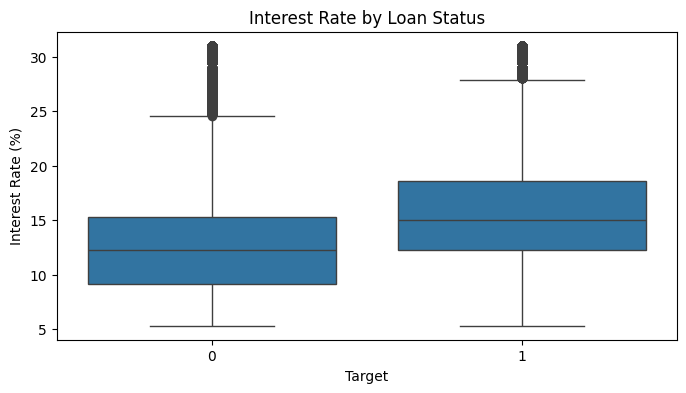

In [62]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='target', y='int_rate')
plt.title("Interest Rate by Loan Status")
plt.xlabel("Target")
plt.ylabel("Interest Rate (%)")
plt.show()

Unsurprisingly, borrowers with a higher interest rate have a higher likelihood of defaulting. However, this could be a result of lenders demanding higher interest rates for higher risk borrowers.

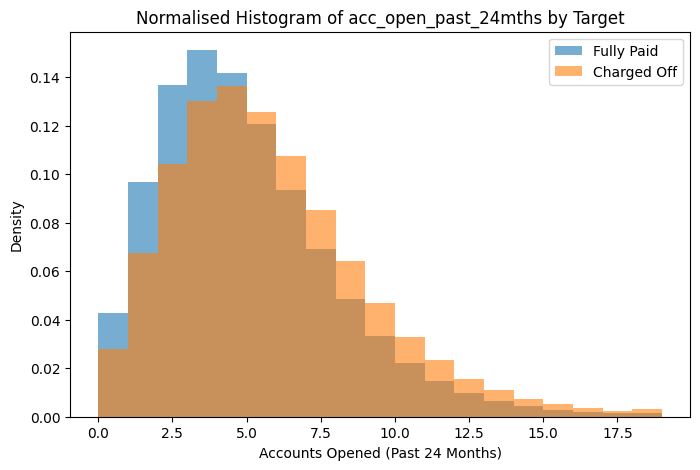

In [63]:
# A boxplot didn't work very well, so let's try a normalised histogram.

plt.figure(figsize=(8, 5))

# Plot normalised histogram for Fully Paid
df[df['target'] == 0]['acc_open_past_24mths'].plot(
    kind='hist', bins=range(0, 20), alpha=0.6, density=True, label='Fully Paid'
)

# Plot normalised histogram for Charged Off
df[df['target'] == 1]['acc_open_past_24mths'].plot(
    kind='hist', bins=range(0, 20), alpha=0.6, density=True, label='Charged Off'
)

plt.xlabel('Accounts Opened (Past 24 Months)')
plt.ylabel('Density')
plt.title('Normalised Histogram of acc_open_past_24mths by Target')
plt.legend()
plt.show()

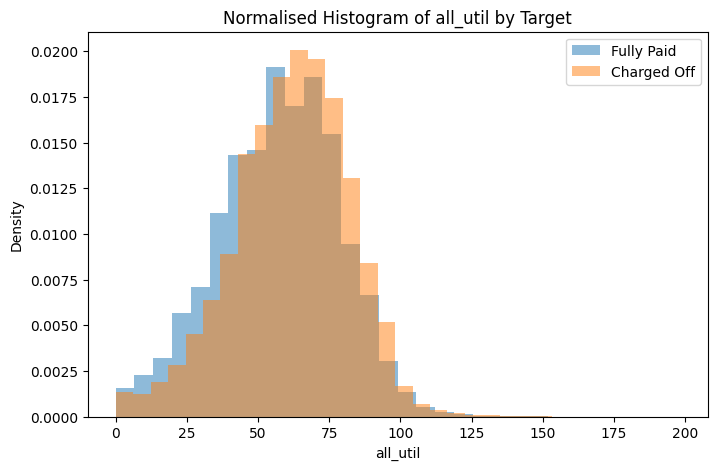

In [64]:
# A boxplot didn't work very well, so let's try a normalised histogram.

plt.figure(figsize=(8, 5))

# Plot histogram for Fully Paid
df[df['target'] == 0]['all_util'].plot(kind='hist', bins=30, alpha=0.5, density=True, label='Fully Paid')

# Plot histogram for Charged Off
df[df['target'] == 1]['all_util'].plot(kind='hist', bins=30, alpha=0.5, density=True, label='Charged Off')

plt.xlabel('all_util')
plt.ylabel('Density')
plt.title('Normalised Histogram of all_util by Target')
plt.legend()
plt.show()

### Categorical Features

In [65]:
target_rate_stats = {}

for col in categorical_cols:
    grouped = df.groupby(col)['target'].agg(['count', 'mean']).rename(columns={'mean': 'target_rate'})
    grouped['diff_vs_overall'] = round(grouped['target_rate'] - df['target'].mean(),3)
    grouped['target_rate'] = grouped['target_rate'].round(3)
    target_rate_stats[col] = grouped.sort_values('target_rate', ascending=False)

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\1408422501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


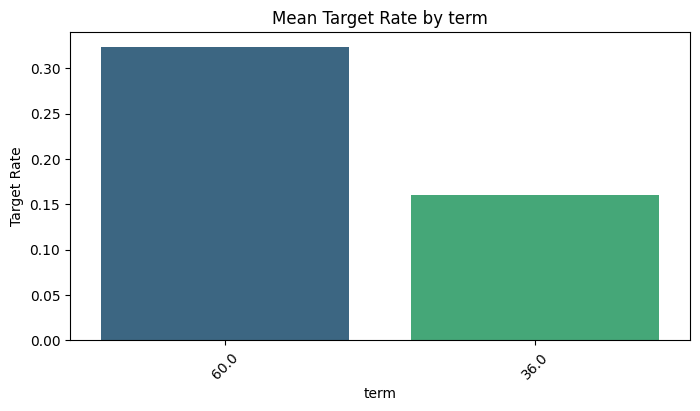

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\1408422501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


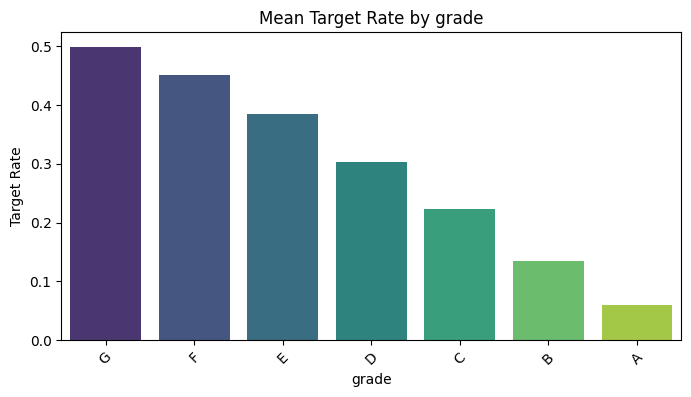

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\1408422501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


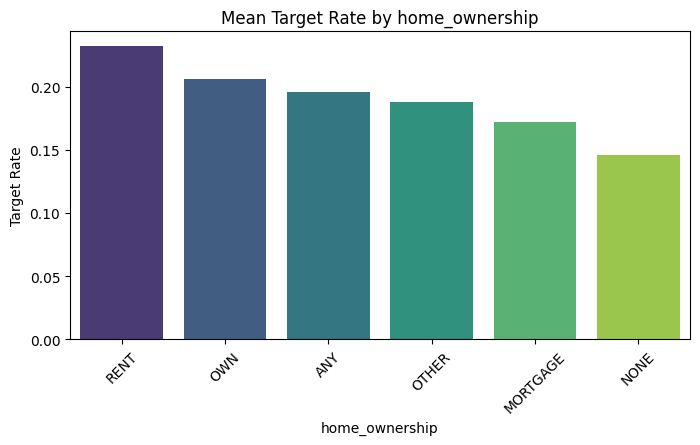

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\1408422501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


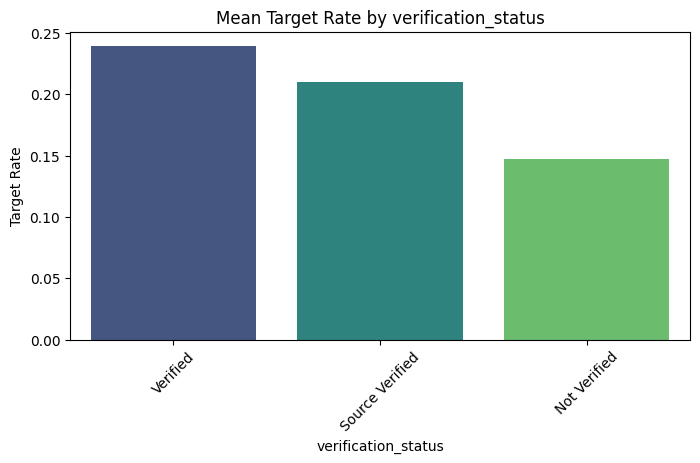

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\1408422501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


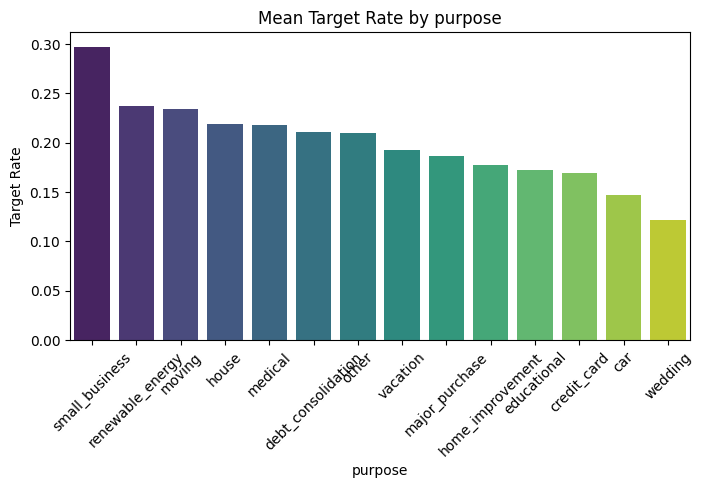

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\1408422501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


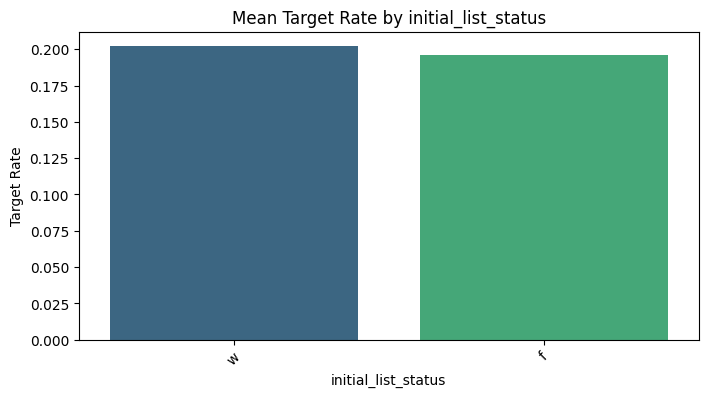

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\1408422501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


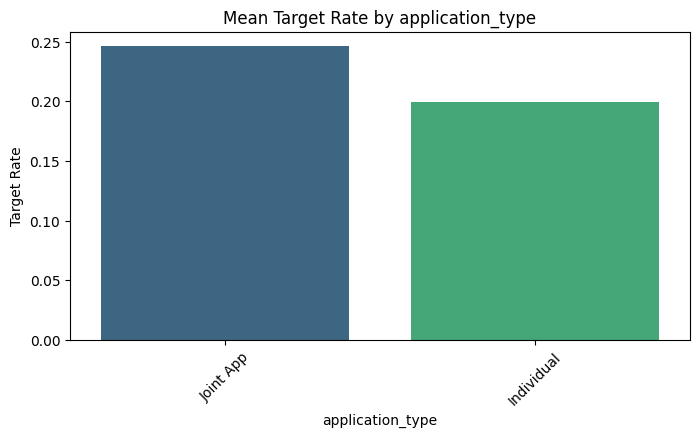

In [66]:
for col, summary_df in target_rate_stats.items():

    # Skip high-cardinality features
    if summary_df.shape[0] > 20:
        continue

    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=summary_df.index,
        y=summary_df['target_rate'],
        order=summary_df.index,
        palette="viridis"
    )
    plt.title(f'Mean Target Rate by {col}')
    plt.ylabel('Target Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\4089529473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


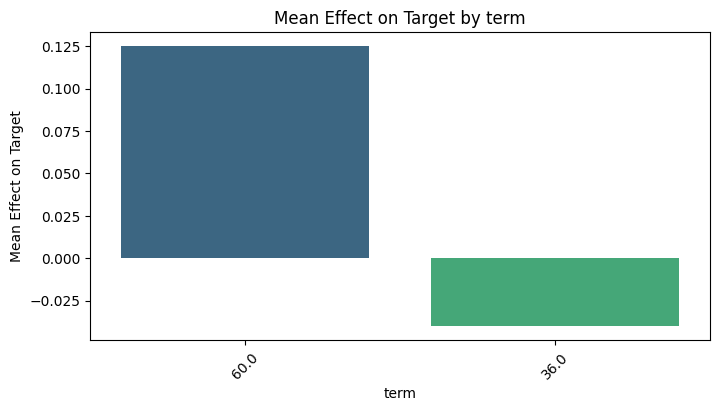

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\4089529473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


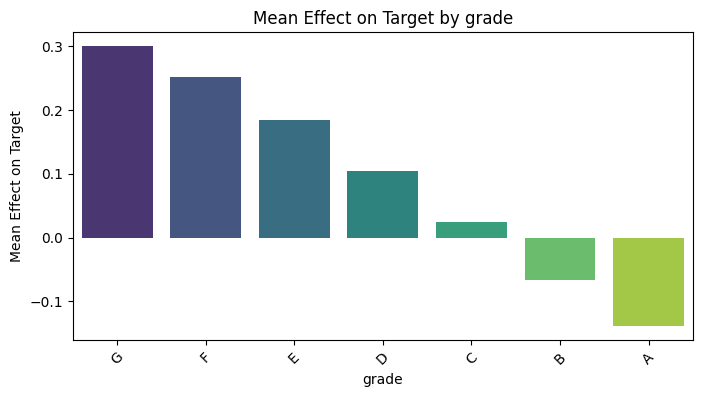

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\4089529473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


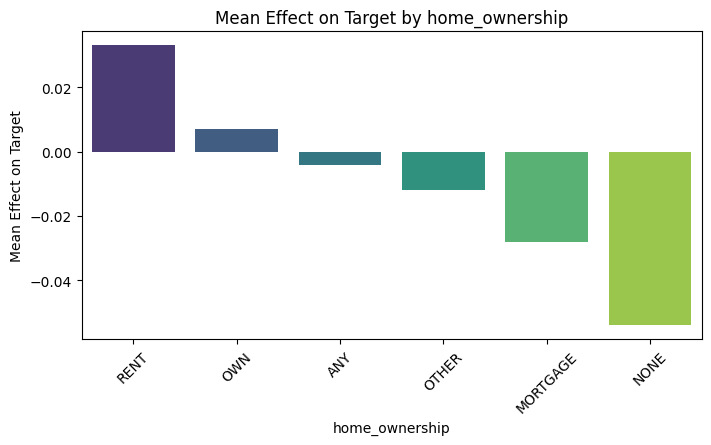

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\4089529473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


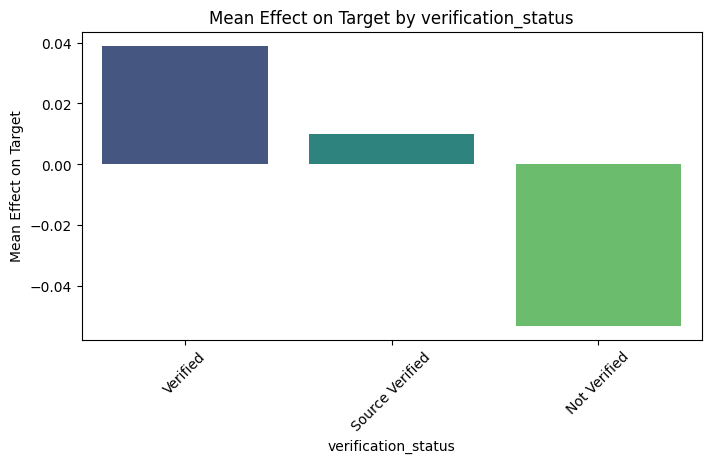

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\4089529473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


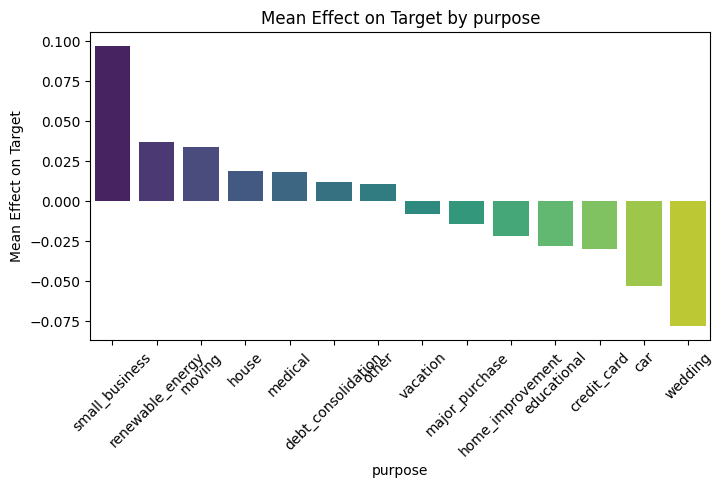

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\4089529473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


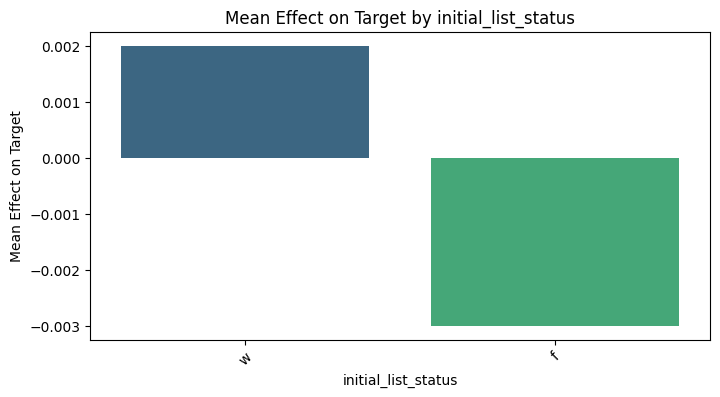

C:\Users\lukeh\AppData\Local\Temp\ipykernel_10688\4089529473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


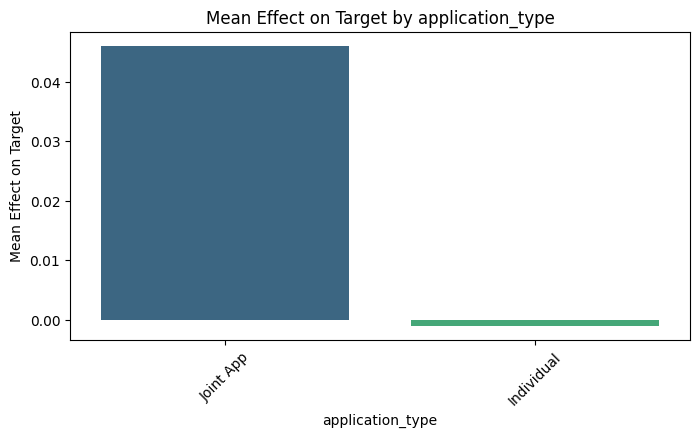

In [67]:
for col, summary_df in target_rate_stats.items():

    # Skip high-cardinality features
    if summary_df.shape[0] > 20:
        continue

    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=summary_df.index,
        y=summary_df['diff_vs_overall'],
        order=summary_df.index,
        palette="viridis"
    )
    plt.title(f'Mean Effect on Target by {col}')
    plt.ylabel('Mean Effect on Target')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

In [68]:
# We can see that the effect of initial_list_status on the target is negligible, so it's safe to drop this.
redundant_cols_to_drop.append('initial_list_status')

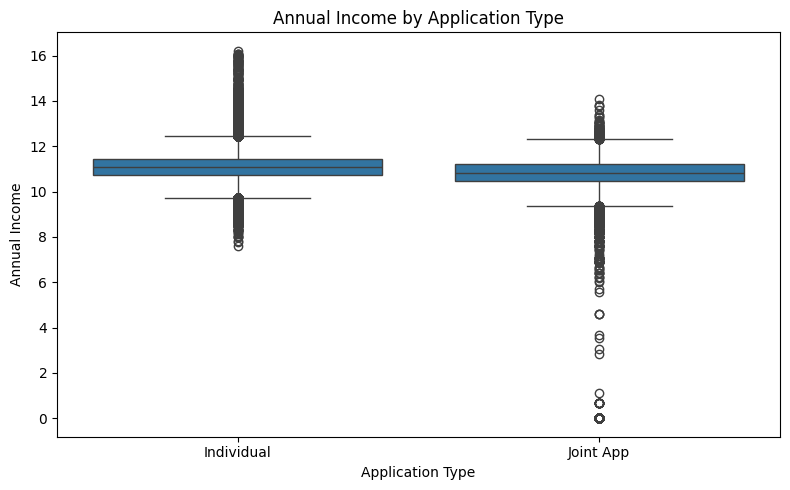

In [69]:
# Let's look at if joint applications have a higher annual income.

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='application_type', y='log_annual_inc')
plt.title('Annual Income by Application Type')
plt.ylabel('Annual Income')
plt.xlabel('Application Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# It appears not.

# Data Preprocessing
Here, we revisit some of the issues we identified earlier on. These include:

- Skewness of numerical columns - possibly need transforming or clipping
- Grouping infrequent categorical values
- Ordinal encoding of sub_grade
- Handling highly correlated features

## Reloading Cleaned Data

Let's ensure we haven't made any lasting changes by reloading the data.

In [70]:
file_path = "../data/loan_data_cleaned.csv"
df = pd.read_csv(file_path)

In [71]:
print(df.shape)
df.dtypes.value_counts()

(1345310, 87)


float64    74
object     12
int64       1
Name: count, dtype: int64

In [72]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['term'] = df['term'].astype('object')

df.dtypes.value_counts()

float64           73
object            12
datetime64[ns]     1
int64              1
Name: count, dtype: int64

## Train-Test Split

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_df = X_train.copy()
train_df['target'] = y_train

## Feature Engineering

### Creating New Features

In [74]:
# During EDA, we said we would create a 'fico_avg' column since 'fico_range_low' and 'fico_range_high' were so highly correlated.
train_df['fico_avg'] = (train_df['fico_range_low'] + train_df['fico_range_high']) / 2
redundant_cols_to_drop.extend(['fico_range_low','fico_range_high'])

In [75]:
# We also discussed a 'loan_to_income' feature to measure the size of the loan compared to the applicant's income.
train_df['loan_to_income'] = train_df['loan_amnt'] / train_df['annual_inc']
train_df.loc[train_df['annual_inc'] == 0, 'loan_to_income'] = np.nan

-0.0003628474326464586


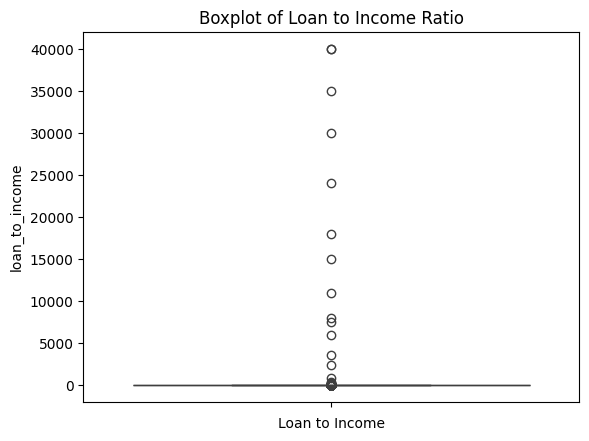

In [76]:
# We saw that outliers strongly distorted the correlation.
print(train_df['loan_to_income'].corr(train_df['target']))

sns.boxplot(y=train_df['loan_to_income'])
plt.title('Boxplot of Loan to Income Ratio')
plt.xlabel('Loan to Income')
plt.show()

0.13755782960198554


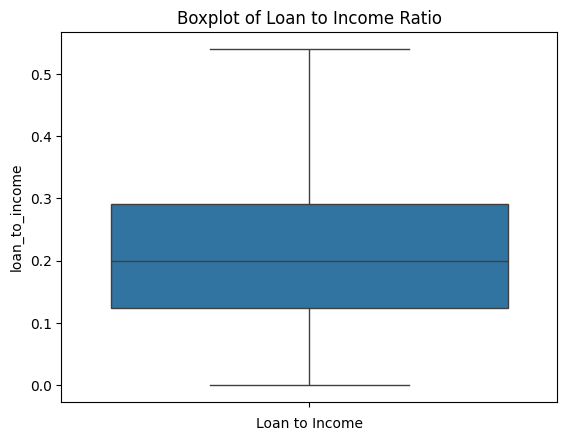

In [77]:
# But removing the outliers gave us a good correlation.
print(train_df[train_df['loan_to_income'] < train_df['loan_to_income'].quantile(0.99)]['loan_to_income'].corr(train_df['target']))

sns.boxplot(y=train_df['loan_to_income'], showfliers=False)
plt.title('Boxplot of Loan to Income Ratio')
plt.xlabel('Loan to Income')
plt.show()

In [78]:
# We want to keep as much information as possible, so let's find the right level to consider handling outliers.
print(train_df['loan_to_income'].quantile([0.99,0.995,0.999,0.9999]))

0.9900    0.500000
0.9950    0.576923
0.9990    1.066667
0.9999    5.384499
Name: loan_to_income, dtype: float64


In [79]:
# Similarly for dti.
print(train_df['dti'].quantile([0.99,0.995,0.999,0.9999]))

0.9900     38.460000
0.9950     39.990000
0.9990     65.951470
0.9999    279.551547
Name: dti, dtype: float64


In [80]:
# Let's clip any values above the 99.5% quantile.
train_df['loan_to_income_clipped'] = train_df['loan_to_income'].clip(upper=train_df['loan_to_income'].quantile(0.995))
train_df['dti_clipped'] = train_df['dti'].clip(upper=train_df['dti'].quantile(0.995))
print(train_df['loan_to_income_clipped'].corr(train_df['target']).round(3))
print(train_df['dti_clipped'].corr(train_df['target']).round(3))

0.139
0.108


In [81]:
very_high_loan_to_income_df = train_df[train_df['loan_to_income'] > train_df['loan_to_income'].quantile(0.995)]
total_samples = very_high_loan_to_income_df.shape[0]
average_target = very_high_loan_to_income_df['target'].mean()

print(f"Number of samples with loan_to_income > 99.5th percentile: {total_samples}")
print(f"Average target value: {average_target:.3f}")

q99 = train_df['loan_to_income'].quantile(0.99)
q995 = train_df['loan_to_income'].quantile(0.995)

high_dti_band = train_df[(train_df['loan_to_income'] > q99) & (train_df['loan_to_income'] <= q995)]
num_samples = high_dti_band.shape[0]
avg_target = high_dti_band['target'].mean()

print(f"Samples between 99% and 99.5% loan_to_income: {num_samples}")
print(f"Average target value in this range: {avg_target:.3f}")

Number of samples with loan_to_income > 99.5th percentile: 5353
Average target value: 0.313
Samples between 99% and 99.5% loan_to_income: 2453
Average target value in this range: 0.302


In [82]:
very_high_dti_df = train_df[train_df['dti'] > train_df['dti'].quantile(0.995)]
total_samples = very_high_dti_df.shape[0]
average_target = very_high_dti_df['target'].mean()

print(f"Number of samples with dti > 99.5th percentile: {total_samples}")
print(f"Average target value: {average_target:.3f}")

q99 = train_df['dti'].quantile(0.99)
q995 = train_df['dti'].quantile(0.995)

high_dti_band = train_df[(train_df['dti'] > q99) & (train_df['dti'] <= q995)]
num_samples = high_dti_band.shape[0]
avg_target = high_dti_band['target'].mean()

print(f"Samples between 99% and 99.5% DTI: {num_samples}")
print(f"Average target value in this range: {avg_target:.3f}")


Number of samples with dti > 99.5th percentile: 5362
Average target value: 0.303
Samples between 99% and 99.5% DTI: 5382
Average target value in this range: 0.309


Note that looking at between the 99th and 99.5th percentiles of loan_to _income gives an average target value 0.302 (0.011 less than > 99.5th percentile).
Similarly, looking at between the 99th and 99.5th percentiles of dti gives 0.309 (0.006 higher than the 99.5th percentile).
These suggest that we aren't losing much information by clipping at the 99.5th percentile.

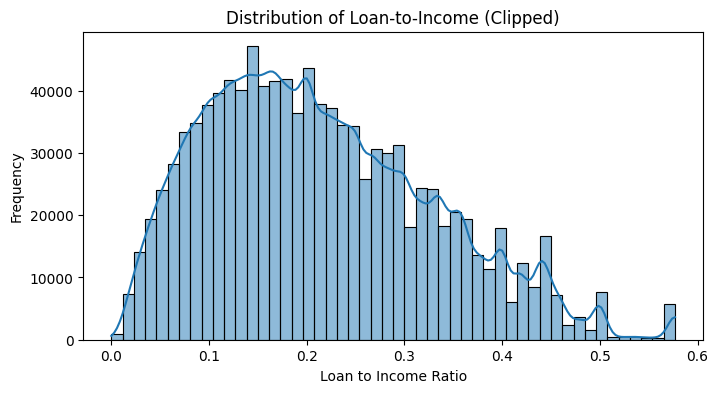

In [83]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['loan_to_income_clipped'], bins=50, kde=True)
plt.title('Distribution of Loan-to-Income (Clipped)')
plt.xlabel('Loan to Income Ratio')
plt.ylabel('Frequency')
plt.show()

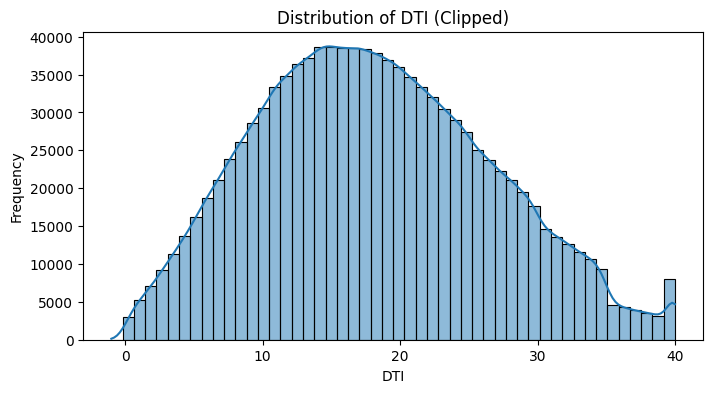

In [84]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['dti_clipped'], bins=50, kde=True)
plt.title('Distribution of DTI (Clipped)')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

Further to this, we want to consider combining 'loan_to_income' with the applicant's existing dti to get a 'total_dti_clipped' feature.
To do this, we actually need to consider the applicant's installment vs monthly gross income instead of 'loan_to_income'.

In [85]:
train_df['installment_to_income'] = 12 * train_df['installment'] / train_df['annual_inc']
train_df.loc[train_df['annual_inc'] == 0, 'installment_to_income'] = np.nan

-0.0003596670241663813


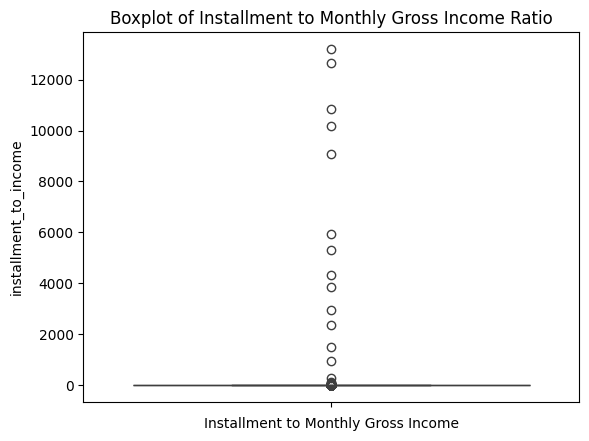

In [86]:
# Again, outliers strongly distort the correlation.
print(train_df['installment_to_income'].corr(train_df['target']))

sns.boxplot(y=train_df['installment_to_income'])
plt.title('Boxplot of Installment to Monthly Gross Income Ratio')
plt.xlabel('Installment to Monthly Gross Income')
plt.show()

0.11868965919502208


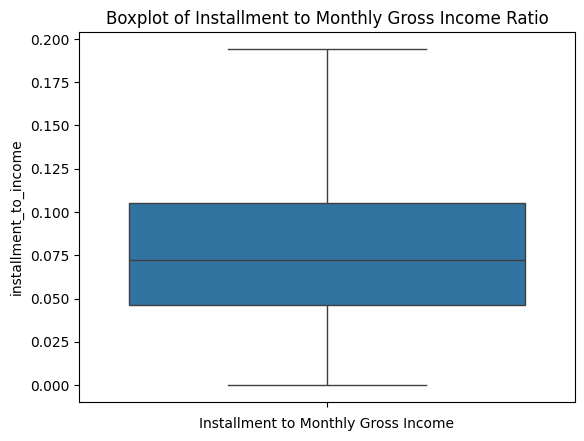

In [87]:
# But removing the outliers gives us a good correlation.
print(train_df[train_df['installment_to_income'] < train_df['installment_to_income'].quantile(0.99)]['installment_to_income'].corr(train_df['target']))

sns.boxplot(y=train_df['installment_to_income'], showfliers=False)
plt.title('Boxplot of Installment to Monthly Gross Income Ratio')
plt.xlabel('Installment to Monthly Gross Income')
plt.show()

In [88]:
print(train_df['installment_to_income'].quantile([0.99,0.995,0.999,0.9999]))

0.9900    0.199402
0.9950    0.219908
0.9990    0.393013
0.9999    1.885803
Name: installment_to_income, dtype: float64


In [89]:
train_df['installment_to_income_clipped'] = train_df['installment_to_income'].clip(upper=train_df['installment_to_income'].quantile(0.995))
print(train_df['installment_to_income_clipped'].corr(train_df['target']).round(3))

0.122


In [90]:
train_df['total_dti_clipped'] = train_df['installment_to_income_clipped'] + train_df['dti_clipped']/100
print(f"Correlation with target: {train_df['total_dti_clipped'].corr(train_df['target']).round(3)}")
print(f"Correlation with installment_to_income_clipped: {train_df['total_dti_clipped'].corr(train_df['installment_to_income_clipped']).round(3)}")
print(f"Correlation with dti_clipped: {train_df['total_dti_clipped'].corr(train_df['dti_clipped']).round(3)}")
print(f"Correlation with installment: {train_df['total_dti_clipped'].corr(train_df['installment']).round(3)}")
print(f"Correlation with annual_inc: {train_df['total_dti_clipped'].corr(train_df['annual_inc']).round(3)}")
print(f"Correlation with term: {train_df['total_dti_clipped'].corr(train_df['term']).round(3)}")

Correlation with target: 0.138
Correlation with installment_to_income_clipped: 0.614
Correlation with dti_clipped: 0.917
Correlation with installment: 0.254
Correlation with annual_inc: -0.247
Correlation with term: 0.087


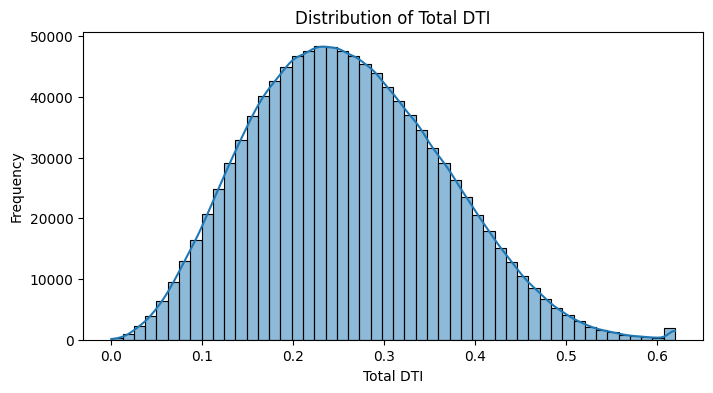

In [91]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['total_dti_clipped'], bins=50, kde=True)
plt.title('Distribution of Total DTI')
plt.xlabel('Total DTI')
plt.ylabel('Frequency')
plt.show()

In [92]:
redundant_cols_to_drop.extend(['dti','installment_to_income']) # No need to drop loan_to_income as we will see later we don't end up needing to engineer it.

Let's also try looking at the total amount owed by the applicant if approved. Then we can compare this to income.

In [93]:
train_df['total_bal_ex_mort_if_approved'] = train_df['loan_amnt'] + train_df['total_bal_ex_mort']
print(f"Correlation with target: {train_df['total_bal_ex_mort_if_approved'].corr(train_df['target']).round(3)}")
print(f"Correlation of loan_amnt with target: {train_df['loan_amnt'].corr(train_df['target']).round(3)}")
print(f"Correlation of total_bal_ex_mort with target: {train_df['total_bal_ex_mort'].corr(train_df['target']).round(3)}")

Correlation with target: 0.007
Correlation of loan_amnt with target: 0.065
Correlation of total_bal_ex_mort with target: -0.004


The correlation of total_bal_ex_mort with the target is so low that this is largely irrelevant.

In [94]:
# One last thought - what about the total amount the applicant has to pay back rather than just the loan amount, and then comparing this to income?

train_df['total_amnt_due'] = train_df['term'].astype(int) * train_df['installment']
train_df['total_amnt_due'].corr(train_df['target'])

0.1172438446973716

In [95]:
train_df['total_amnt_due_to_inc'] = train_df['total_amnt_due'] / train_df['annual_inc']
train_df['total_amnt_due_to_inc_clipped'] = train_df['total_amnt_due_to_inc'].clip(upper=train_df['total_amnt_due_to_inc'].quantile(0.995))
train_df['total_amnt_due_to_inc_clipped'].corr(train_df['target'])

0.18608512859306242

In [96]:
# This dwarfs the correlations of all of the loan_amnt and installment related columns.
# Let's go without all of those ones outlined above, and define this new feature instead.
redundant_cols_to_drop.extend(['total_amnt_due_to_inc','installment_to_income','installment_to_income_clipped'])

In [97]:
print(redundant_cols_to_drop)

['zip_code', 'emp_title', 'title', 'grade', 'initial_list_status', 'fico_range_low', 'fico_range_high', 'dti', 'installment_to_income', 'total_amnt_due_to_inc', 'installment_to_income', 'installment_to_income_clipped']


### Transforming Features

From our EDA, we saw that annual_inc and installment both improved 0.01 or more when we applied a log transformation. Let's explore this again, but also consider clipping these features as well.

In [98]:
print(train_df['annual_inc'].quantile([0.99,0.995,0.999,0.9999]))
print()
print(train_df['installment'].quantile([0.99,0.995,0.999,0.9999]))

0.9900     250000.0
0.9950     325000.0
0.9990     580000.0
0.9999    1500000.0
Name: annual_inc, dtype: float64

0.9900    1222.42130
0.9950    1268.85000
0.9990    1369.04554
0.9999    1501.00000
Name: installment, dtype: float64


In [99]:
train_df['annual_inc_clipped'] = train_df['annual_inc'].clip(upper=train_df['annual_inc'].quantile(0.995))
train_df['installment_clipped'] = train_df['installment'].clip(upper=train_df['installment'].quantile(0.995))

corr_annual_inc = train_df['annual_inc'].corr(train_df['target'])
corr_annual_inc_clipped = train_df['annual_inc_clipped'].corr(train_df['target'])

corr_installment = train_df['installment'].corr(train_df['target'])
corr_installment_clipped = train_df['installment_clipped'].corr(train_df['target'])

print(f"Original annual_inc correlation to target: {corr_annual_inc:.3f}, vs clipped: {corr_annual_inc_clipped:.3f}")
print(f"Original installment correlation to target: {corr_installment:.3f}, vs clipped: {corr_installment_clipped:.3f}")

Original annual_inc correlation to target: -0.042, vs clipped: -0.062
Original installment correlation to target: 0.051, vs clipped: 0.051


In [100]:
train_df['log_annual_inc_clipped'] = np.log1p(train_df['annual_inc_clipped'])
train_df['log_installment_clipped'] = np.log1p(train_df['installment_clipped'])

corr_log_annual_clipped = train_df['log_annual_inc_clipped'].corr(train_df['target'])
corr_log_install_clipped = train_df['log_installment_clipped'].corr(train_df['target'])

print(f"Clipped annual_inc correlation to target: {corr_annual_inc_clipped:.3f}, vs log clipped: {corr_log_annual_clipped:.3f}")
print(f"Clipped installment correlation to target: {corr_installment_clipped:.3f}, vs log clipped: {corr_log_install_clipped:.3f}")


Clipped annual_inc correlation to target: -0.062, vs log clipped: -0.063
Clipped installment correlation to target: 0.051, vs log clipped: 0.061


Comparing to our EDA, we see that clipping annual_inc gives a very similar correlation with the target as log transforming it, and there is no benefit to doing both.
We also see that clipping installment has no benefit, and log transforming it only gives a small increase to the correlation with the target.

Let's log transform annual_inc rather than clip it so that we can retain outliers. We will leave installment as it is as it only gives a slightly better correlation when log transformed.

In [101]:
train_df['log_annual_inc'] = np.log1p(train_df['annual_inc'])
corr_log_annual_inc = train_df['log_annual_inc'].corr(train_df['target'])
print(corr_log_annual_inc.round(3))
print(train_df['log_annual_inc'].corr(train_df['annual_inc']).round(3))

# Again, we may want to drop annual_inc if using Log Reg, but not if using RF etc.
# redundant_cols_to_drop.append('annual_inc')

-0.063
0.654


In [102]:
# List of features we have engineered:

# train_df['fico_avg'] = (train_df['fico_range_low'] + train_df['fico_range_high']) / 2

# train_df['loan_to_income'] = train_df['loan_amnt'] / train_df['annual_inc']
# train_df.loc[train_df['annual_inc'] == 0, 'loan_to_income'] = np.nan

# train_df['loan_to_income_clipped'] = train_df['loan_to_income'].clip(upper=train_df['loan_to_income'].quantile(0.995))
# train_df['dti_clipped'] = train_df['dti'].clip(upper=train_df['dti'].quantile(0.995))

# train_df['installment_to_income'] = 12 * train_df['installment'] / train_df['annual_inc']
# train_df.loc[train_df['annual_inc'] == 0, 'installment_to_income'] = np.nan

# train_df['installment_to_income_clipped'] = train_df['installment_to_income'].clip(upper=train_df['installment_to_income'].quantile(0.995))

# train_df['total_dti_clipped'] = train_df['installment_to_income_clipped'] + train_df['dti_clipped']/100

# train_df['log_annual_inc'] = np.log1p(train_df['annual_inc'])

# We are then going to drop 'loan_to_income', 'dti' and 'installment_to_income' as they become redundant once we have the clipped versions of the same features.

## Imputing Missing Values

### Numerical Features

We've already seen from EDA that we can drop a large number of mostly-null columns, so let's look at the other columns.

In [103]:
cols_to_drop = list(set(null_cols_to_drop + zero_cols_to_drop + low_var_cols_to_drop + redundant_cols_to_drop))

missing_cols = [col for col in train_df.select_dtypes(include=['number', 'bool']).columns if train_df[col].isna().any() and col not in cols_to_drop]

missing_df = train_df[missing_cols].isna().sum().to_frame(name='missing_count')
missing_df['missing_percent'] = (train_df[missing_cols].isna().mean() * 100).round(2)

missing_df = missing_df.sort_values(by='missing_count', ascending=False)

pd.set_option('display.max_rows', None)
display(missing_df)

missing_count  missing_percent
mths_since_recent_inq                 139445            12.96
mo_sin_old_il_acct                     84595             7.86
emp_length                             62826             5.84
pct_tl_nvr_dlq                         54303             5.05
avg_cur_bal                            54192             5.04
num_rev_accts                          54176             5.03
total_il_high_credit_limit             54175             5.03
tot_hi_cred_lim                        54175             5.03
num_tl_op_past_12m                     54175             5.03
num_rev_tl_bal_gt_0                    54175             5.03
num_op_rev_tl                          54175             5.03
num_il_tl                              54175             5.03
num_actv_rev_tl                        54175             5.03
num_actv_bc_tl                         54175             5.03
num_bc_tl                              54175             5.03
total_rev_hi_lim                       54175             5.03
mo_sin_rcnt_tl                         54175             5.03
tot_cur_bal                            54175             5.03
mo_sin_rcnt_rev_tl_op                  54175             5.03
mo_sin_old_rev_tl_op                   54175             5.03
bc_util                                49624             4.61
percent_bc_gt_75                       49326             4.58
bc_open_to_buy                         48995             4.55
mths_since_recent_bc                   48267             4.48
num_sats                               44791             4.16
num_bc_sats                            44791             4.16
acc_open_past_24mths                   37953             3.53
mort_acc                               37953             3.53
total_bal_ex_mort                      37953             3.53
total_bc_limit                         37953             3.53
total_bal_ex_mort_if_approved          37953             3.53
revol_util                               695             0.06
pub_rec_bankruptcies                     571             0.05
dti_clipped                              296             0.03
total_dti_clipped                        296             0.03
loan_to_income                           283             0.03
loan_to_income_clipped                   283             0.03
inq_last_6mths                             1             0.00

It is possible that the 'months since' and count columns are null as a result of not having something in the first place. However, the fact that multiple columns have the same amount of missing values would suggest they were simply not recorded. Still, we can explore the former.

In [104]:
month_cols = ['mths_since_recent_inq', 'mo_sin_old_il_acct', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'mths_since_recent_bc']

train_df[month_cols].describe()

mths_since_recent_inq  mo_sin_old_il_acct  mo_sin_rcnt_tl  \
count          936803.000000       991653.000000    1.022073e+06   
mean                6.713344          125.802894    7.855973e+00   
std                 5.851094           52.204773    8.724744e+00   
min                 0.000000            0.000000    0.000000e+00   
25%                 2.000000           98.000000    3.000000e+00   
50%                 5.000000          129.000000    5.000000e+00   
75%                10.000000          152.000000    1.000000e+01   
max                25.000000          999.000000    3.140000e+02   

       mo_sin_rcnt_rev_tl_op  mo_sin_old_rev_tl_op  mths_since_recent_bc  
count           1.022073e+06          1.022073e+06          1.027981e+06  
mean            1.311475e+01          1.814435e+02          2.384418e+01  
std             1.632428e+01          9.443315e+01          3.073862e+01  
min             0.000000e+00          2.000000e+00          0.000000e+00  
25%             4.000000e+00          1.170000e+02          6.000000e+00  
50%             8.000000e+00          1.640000e+02          1.300000e+01  
75%             1.600000e+01          2.300000e+02          2.800000e+01  
max             4.380000e+02          8.520000e+02          6.390000e+02

In [105]:
print(train_df[train_df['mths_since_recent_inq'].isna()]['inq_fi'].value_counts())
print(train_df[train_df['mo_sin_old_il_acct'].isna()]['num_il_tl'].value_counts())
print(train_df[train_df['mo_sin_rcnt_tl'].isna()]['num_tl_op_past_12m'].value_counts())
print(train_df[train_df['mo_sin_rcnt_rev_tl_op'].isna()]['num_op_rev_tl'].value_counts())
print(train_df[train_df['mo_sin_old_rev_tl_op'].isna()]['num_op_rev_tl'].value_counts())
print(train_df[train_df['mths_since_recent_bc'].isna()]['num_actv_bc_tl'].value_counts())

inq_fi
0.0    39449
Name: count, dtype: int64
num_il_tl
0.0    30386
1.0       29
2.0        5
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
num_actv_bc_tl
0.0    10122
Name: count, dtype: int64


In [106]:
train_df_2 = train_df[train_df['mo_sin_rcnt_tl'].isna() == False] # Picked what seems to be the most basic criterion (i.e. having an account) among the features with the same amount of null values.

missing_cols_2 = [col for col in train_df_2.select_dtypes(include=['number', 'bool']).columns if train_df_2[col].isna().any() and col not in cols_to_drop]

print(f"{len(missing_cols_2)} features left with nulls vs {len(missing_cols)} originally.")

missing_df_2 = train_df_2[missing_cols_2].isna().sum().to_frame(name='missing_count')
missing_df_2['missing_percent'] = (train_df_2[missing_cols_2].isna().mean() * 100).round(2)

missing_df_2 = missing_df_2.sort_values(by='missing_count', ascending=False)

pd.set_option('display.max_rows', None)
display(missing_df_2)

16 features left with nulls vs 38 originally.


missing_count  missing_percent
mths_since_recent_inq           99304             9.72
emp_length                      61184             5.99
mo_sin_old_il_acct              30420             2.98
bc_util                         11441             1.12
percent_bc_gt_75                11155             1.09
bc_open_to_buy                  10824             1.06
mths_since_recent_bc            10122             0.99
revol_util                        624             0.06
dti_clipped                       296             0.03
total_dti_clipped                 296             0.03
loan_to_income                    283             0.03
loan_to_income_clipped            283             0.03
pct_tl_nvr_dlq                    128             0.01
avg_cur_bal                        17             0.00
inq_last_6mths                      1             0.00
num_rev_accts                       1             0.00

If we dropped these ~5% of rows, we would save ourselves having to impute at least 21 entries in each. We don't know how to impute them since we cannot say that they are 0. We could impute with the median, but guessing that many entries in each row could cause more issues than it's worth. Let's drop these rows as long as they do not differ significantly from the rest of the data.

In [107]:
print(train_df[train_df['mo_sin_rcnt_tl'].isna()]['target'].mean().round(3))

0.153


The average target value of these rows is 0.153, which is fairly significantly different from the average target value of ~0.2 amongst the wider dataset. Therefore, let's keep these rows, imputing them with the median but also adding a null flag column to show that we have imputed lots of entries in these rows. Fortunately, we will only need one null flag column vs the 21 we would have needed if they weren't all null in the same rows.

In [108]:
# Create a flag feature for no account data.
train_df['account_data_null_flag'] = train_df['mo_sin_rcnt_tl'].isna().astype(int)

In [109]:
# The original 'dti' columns already contained nulls. Most of them were caused by annual_inc = 0, but there are 13 other null values we need to figure out what to do with.
train_df[(train_df['annual_inc'] != 0) &(train_df['dti'].isna())]

loan_amnt  term  int_rate  installment grade sub_grade emp_title  \
1328406    15000.0  36.0     11.39       493.86     B        B3       NaN   
393513      6000.0  36.0     10.42       194.79     B        B3       NaN   
1283547     3600.0  36.0     14.08       123.18     C        C3       NaN   
396845     40000.0  60.0     12.62       902.37     C        C1       NaN   
580364     24000.0  36.0      8.39       756.40     B        B1       NaN   
1286993    40000.0  60.0      9.93       848.51     B        B2     Admin   
1267019    15000.0  36.0     10.91       490.45     B        B4        RN   
613172     18000.0  60.0     16.29       440.51     D        D1       NaN   
969208     30000.0  36.0     15.99      1054.57     C        C5       NaN   
482191      2400.0  36.0     11.47        79.11     B        B5       NaN   
904107      8000.0  36.0     25.81       321.52     E        E4       NaN   
1303473    35000.0  36.0      8.24      1100.66     B        B1  co-owner   
400346     11000.0  36.0     10.91       359.66     B        B4       NaN   

         emp_length home_ownership  annual_inc verification_status  \
1328406         NaN       MORTGAGE         1.0        Not Verified   
393513          NaN       MORTGAGE         1.0        Not Verified   
1283547         NaN           RENT         1.0            Verified   
396845          NaN       MORTGAGE         1.0        Not Verified   
580364          NaN       MORTGAGE         1.0        Not Verified   
1286993         0.5       MORTGAGE         1.0        Not Verified   
1267019        10.0           RENT         2.0        Not Verified   
613172          NaN       MORTGAGE         1.0        Not Verified   
969208          NaN       MORTGAGE         1.0        Not Verified   
482191          NaN           RENT         1.0        Not Verified   
904107          NaN       MORTGAGE         1.0        Not Verified   
1303473         2.0       MORTGAGE         1.0        Not Verified   
400346          NaN       MORTGAGE         1.0        Not Verified   

                    purpose                    title zip_code addr_state  dti  \
1328406  debt_consolidation       Debt consolidation    754xx         TX  NaN   
393513     home_improvement         Home improvement    215xx         MD  NaN   
1283547               other                    Other    900xx         CA  NaN   
396845   debt_consolidation       Debt consolidation    840xx         UT  NaN   
580364   debt_consolidation       Debt consolidation    605xx         IL  NaN   
1286993    home_improvement         Home improvement    949xx         CA  NaN   
1267019  debt_consolidation       Debt consolidation    461xx         IN  NaN   
613172   debt_consolidation       Debt consolidation    327xx         FL  NaN   
969208   debt_consolidation       Debt consolidation    809xx         CO  NaN   
482191          credit_card  Credit card refinancing    560xx         MN  NaN   
904107   debt_consolidation       Debt consolidation    128xx         NY  NaN   
1303473  debt_consolidation       Debt consolidation    554xx         MN  NaN   
400346   debt_consolidation       Debt consolidation    333xx         FL  NaN   

         delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
1328406          2.0       2006-01-01           680.0            684.0   
393513           0.0       2004-11-01           725.0            729.0   
1283547          0.0       1991-10-01           680.0            684.0   
396845           0.0       2000-05-01           680.0            684.0   
580364           1.0       2006-06-01           715.0            719.0   
1286993          1.0       2001-07-01           720.0            724.0   
1267019          1.0       2001-09-01           670.0            674.0   
613172           0.0       2002-10-01           670.0            674.0   
969208           0.0       2006-02-01           660.0            664.0   
482191           0.0       1990-09-01           675.0            679.0   


In [110]:
# We can reasonably replace the dti with the maximum value of dti as we would do if annual_inc = 0.
print(train_df['dti'].max())

999.0


In [111]:
print(missing_cols_2)

['emp_length', 'inq_last_6mths', 'revol_util', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_rev_accts', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'loan_to_income', 'loan_to_income_clipped', 'dti_clipped', 'total_dti_clipped']


Now let's look at the other columns that need imputing, ordered by number of missing values.

In [112]:
remaining_cols_to_impute = ['emp_length', 'inq_last_6mths', 'revol_util', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_rev_accts', 'pct_tl_nvr_dlq', 'percent_bc_gt_75']

In [113]:
print(train_df['mths_since_recent_inq'].isna().sum())

139445


In [114]:
# Let's focus on the higher % nulls now.
# These include 'mths_since_recent_inq', 'emp_length', and 'mo_sin_old_il_acct'.

print(train_df[train_df['mths_since_recent_inq'].isna()]['inq_fi'].isna().sum())
print(train_df[train_df['mths_since_recent_inq'].isna()]['inq_fi'].value_counts())
# All are 0 or null --> no inquiries. We want to impute this with a large value, however this would cause issues if we try to use Logistic Regression during modelling.
# Perhaps we can impute with a large value, exclude it from linear models and use a flag feature instead?
train_df['zero_inqs_flag'] = train_df['mths_since_recent_inq'].isna().astype(int)
corr_mths_since_recent_inq = train_df['mths_since_recent_inq'].corr(train_df['target'])
corr_zero_inqs_flag = train_df['zero_inqs_flag'].corr(train_df['target'])
print()

print(f"Correlations with target:")
print(f"mths_since_recent_inq: {corr_mths_since_recent_inq:.3f}")
print(f"zero_inqs_flag: {corr_zero_inqs_flag:.3f}")
print()

print(train_df[train_df['emp_length'].isna()]['emp_title'].isna().sum())
print(train_df[train_df['emp_length'].isna()]['emp_title'].value_counts().sum()) # We can just use impute with 0 as emp_length null implies unemployed in most cases.
print()

print(train_df[train_df['mo_sin_old_il_acct'].isna()]['num_il_tl'].isna().sum())
print(train_df[train_df['mo_sin_old_il_acct'].isna()]['num_il_tl'].value_counts()) # Similar to 'mths_since_recent_iq'.
train_df['zero_il_accts_flag'] = train_df['mo_sin_old_il_acct'].isna().astype(int)
corr_mo_sin_old_il_acct = train_df['mo_sin_old_il_acct'].corr(train_df['target'])
corr_zero_il_accts_flag = train_df['zero_il_accts_flag'].corr(train_df['target'])
print()

print(f"Correlations with target:")
print(f"mo_sin_old_il_acct: {corr_mo_sin_old_il_acct:.3f}")
print(f"zero_il_accts_flag: {corr_zero_il_accts_flag:.3f}")

99996
inq_fi
0.0    39449
Name: count, dtype: int64

Correlations with target:
mths_since_recent_inq: -0.056
zero_inqs_flag: -0.049

62341
485

54175
num_il_tl
0.0    30386
1.0       29
2.0        5
Name: count, dtype: int64

Correlations with target:
mo_sin_old_il_acct: -0.026
zero_il_accts_flag: -0.018


In [115]:
# Medium % nulls.
# These include 'bc_util', 'percent_bc_gt_75', 'bc_open_to_buy' and 'mths_since_recent_bc'.

print(train_df[train_df['bc_util'].isna()]['num_actv_bc_tl'].isna().sum())
print(train_df[train_df['bc_util'].isna()]['num_actv_bc_tl'].value_counts())
# Again, mostly 0 or null currently active bank cards --> no balance, therefore we should impute with 0.
print()

print(train_df[train_df['percent_bc_gt_75'].isna()]['num_actv_bc_tl'].isna().sum())
print(train_df[train_df['percent_bc_gt_75'].isna()]['num_actv_bc_tl'].value_counts())
# Same as above.
print()

print(train_df[train_df['bc_open_to_buy'].isna()]['num_actv_bc_tl'].isna().sum())
print(train_df[train_df['bc_open_to_buy'].isna()]['num_actv_bc_tl'].value_counts())
# Same again.
print()

print(train_df[train_df['mths_since_recent_bc'].isna()]['num_actv_bc_tl'].isna().sum())
print(train_df[train_df['mths_since_recent_bc'].isna()]['num_actv_bc_tl'].value_counts())
# Similar, but since it's a 'number of months since' column, we want to impute with a large number.
# Once again, we will have to consider how this will affect linear models vs tree-based models.

train_df['zero_recent_bc_flag'] = train_df['mths_since_recent_bc'].isna().astype(int)


38183
num_actv_bc_tl
0.0    10863
1.0      492
2.0       77
3.0        5
5.0        2
4.0        2
Name: count, dtype: int64

38171
num_actv_bc_tl
0.0    11145
1.0       10
Name: count, dtype: int64

38171
num_actv_bc_tl
0.0    10824
Name: count, dtype: int64

38145
num_actv_bc_tl
0.0    10122
Name: count, dtype: int64


In [116]:
# Low % nulls (< 0.1%).
# These include 'revol_util', 'pct_tl_nvr_dlq', 'avg_cur_bal', 'inq_last_6mths' and 'num_rev_accts'.
# Given all of these features have < 0.1% nulls, we can just impute based on the data dictionary.
# We will impute them all with 0, except 'pct_tl_nvr_dlq' which we will impute with 100.

print(train_df['pct_tl_nvr_dlq'].mean())

94.16344529304413


In [117]:
# List all numerical columns that we don't want to be imputed with the median. Then, when we impute, we can set the rest of the numerical columns to impute with the median.

# Features that may need different imputation methods based on choice of model: mths_since_recent_inq, mo_sin_old_il_acct, mths_since_recent_bc.

zero_fill_cols = [
    'num_rev_accts',
    'inq_last_6mths',
    'emp_length',
    'bc_util',
    'percent_bc_gt_75',
    'bc_open_to_buy',
    'revol_util',
    'avg_cur_bal'
]

hundred_fill_cols = [
    'pct_tl_nvr_dlq'
]

max_fill_cols = [
    'dti_clipped',
    'total_dti_clipped'
]

# For non-linear models
sentinel_999_fill_cols = [
    'mths_since_recent_inq',
    'mo_sin_old_il_acct',
    'mths_since_recent_bc'
]

In [118]:
# New features:

# train_df['acct_null_flag'] = train_df['mo_sin_rcnt_tl'].isna().astype(int)

# train_df['zero_inqs_flag'] = train_df['mths_since_recent_inq'].isna().astype(int)

# train_df['zero_il_accts_flag'] = train_df['mo_sin_old_il_acct'].isna().astype(int)

# train_df['zero_recent_bc_flag'] = train_df['mths_since_recent_bc'].isna().astype(int)

### Categorical Features

In [119]:
categorical_cols = train_df.select_dtypes(include=["object", "category"]).columns.tolist()

missing_counts = train_df[categorical_cols].isna().sum().sort_values(ascending=False)

print(missing_counts)

emp_title              68607
title                  13348
term                       0
grade                      0
sub_grade                  0
home_ownership             0
verification_status        0
purpose                    0
zip_code                   0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64


In [120]:
# We've already decided we're going to drop emp_title and title, so we don't need to impute any of the categorical columns.

## Categorical Encoding/Grouping

### Grouping

In [121]:
# Grouping home_ownership
train_df['home_ownership_grouped'] = train_df['home_ownership'].replace({'ANY': 'Other (Grouped)', 'OTHER': 'Other (Grouped)', 'NONE': 'Other (Grouped)'})
print(train_df['home_ownership_grouped'].value_counts(ascending=True).head(10))

home_ownership_grouped
Other (Grouped)       380
OWN                115673
RENT               427791
MORTGAGE           532404
Name: count, dtype: int64


In [122]:
# For later

home_map = {
    "ANY":   "Other",
    "OTHER": "Other",
    "NONE":  "Other",
}

redundant_cols_to_drop.append('home_ownership')

In [123]:
# Grouping addr_state
# We want to group addr_state by something meaningful, such as GDP or geographical region
avg_and_n = (
    train_df
      .groupby("addr_state", as_index=False)
      .agg(
          avg_target=("target", "mean"),   # average of the target
          n_rows=("target",  "size")       # how many rows in that state
      )
).sort_values(by='avg_target',ascending=False)

print(avg_and_n)

   addr_state  avg_target  n_rows
25         MS    0.263078    5257
29         NE    0.254386    2850
2          AR    0.241851    8038
1          AL    0.239526   13247
36         OK    0.234364    9801
18         LA    0.232883   12371
34         NY    0.220191   88128
33         NV    0.218956   16090
32         NM    0.215237    5933
15         IN    0.214590   17368
9          FL    0.213802   76627
41         SD    0.213610    2219
24         MO    0.212699   17104
31         NJ    0.212421   38725
42         TN    0.212240   16307
20         MD    0.211883   24858
17         KY    0.209284   10297
38         PA    0.207676   36345
27         NC    0.206539   30096
35         OH    0.206079   35171
11         HI    0.203050    5442
22         MI    0.202963   28143
0          AK    0.202128    2538
28         ND    0.200772    1295
45         VA    0.199022   30469
43         TX    0.198565   88082
23         MN    0.197923   19068
3          AZ    0.196873   26286
4          CA 

In [124]:
census_region = {
    # Northeast
    "CT":"Northeast","ME":"Northeast","MA":"Northeast","NH":"Northeast",
    "RI":"Northeast","VT":"Northeast","NJ":"Northeast","NY":"Northeast","PA":"Northeast",
    # Midwest
    "IL":"Midwest","IN":"Midwest","MI":"Midwest","OH":"Midwest","WI":"Midwest",
    "IA":"Midwest","KS":"Midwest","MN":"Midwest","MO":"Midwest","NE":"Midwest","ND":"Midwest","SD":"Midwest",
    # South
    "DE":"South","FL":"South","GA":"South","MD":"South","NC":"South","SC":"South","VA":"South","DC":"South","WV":"South",
    "AL":"South","KY":"South","MS":"South","TN":"South","AR":"South","LA":"South","OK":"South","TX":"South",
    # West
    "AZ":"West","CO":"West","ID":"West","MT":"West","NV":"West","NM":"West","UT":"West","WY":"West",
    "AK":"West","CA":"West","HI":"West","OR":"West","WA":"West"
}

train_df["state_region"] = train_df["addr_state"].map(census_region)

grouped = train_df.groupby("state_region")['target'].agg(['count', 'mean']).rename(columns={'mean': 'target_rate'})
grouped['diff_vs_overall'] = round(grouped['target_rate'] - train_df['target'].mean(),3)
grouped['target_rate'] = grouped['target_rate'].round(3)
print(grouped)

               count  target_rate  diff_vs_overall
state_region                                      
Midwest       187881        0.198           -0.002
Northeast     217371        0.206            0.006
South         382600        0.206            0.006
West          288396        0.188           -0.012


Clearly this gives no meaningful result.

In [125]:
census_region = {
    # 1. New England
    "CT": "New England", "ME": "New England", "MA": "New England",
    "NH": "New England", "RI": "New England", "VT": "New England",

    # 2. Middle Atlantic
    "NJ": "Middle Atlantic", "NY": "Middle Atlantic", "PA": "Middle Atlantic",

    # 3. East North Central
    "IL": "East North Central", "IN": "East North Central", "MI": "East North Central",
    "OH": "East North Central", "WI": "East North Central",

    # 4. West North Central
    "IA": "West North Central", "KS": "West North Central", "MN": "West North Central",
    "MO": "West North Central", "ND": "West North Central", "NE": "West North Central",
    "SD": "West North Central",

    # 5. South Atlantic
    "DC": "South Atlantic", "DE": "South Atlantic", "FL": "South Atlantic",
    "GA": "South Atlantic", "MD": "South Atlantic", "NC": "South Atlantic",
    "SC": "South Atlantic", "VA": "South Atlantic", "WV": "South Atlantic",

    # 6. East South Central
    "AL": "East South Central", "KY": "East South Central",
    "MS": "East South Central", "TN": "East South Central",

    # 7. West South Central
    "AR": "West South Central", "LA": "West South Central",
    "OK": "West South Central", "TX": "West South Central",

    # 8. Mountain
    "AZ": "Mountain", "CO": "Mountain", "ID": "Mountain", "MT": "Mountain",
    "NM": "Mountain", "NV": "Mountain", "UT": "Mountain", "WY": "Mountain",

    # 9. Pacific
    "AK": "Pacific", "CA": "Pacific", "HI": "Pacific", "OR": "Pacific", "WA": "Pacific"
}

train_df["state_region"] = train_df["addr_state"].map(census_region)

grouped = train_df.groupby("state_region")['target'].agg(['count', 'mean']).rename(columns={'mean': 'target_rate'})
grouped['diff_vs_overall'] = round(grouped['target_rate'] - train_df['target'].mean(),3)
grouped['target_rate'] = grouped['target_rate'].round(3)
print(grouped)

                     count  target_rate  diff_vs_overall
state_region                                            
East North Central  136380        0.197           -0.003
East South Central   45108        0.226            0.026
Middle Atlantic     163198        0.216            0.016
Mountain             86785        0.186           -0.014
New England          54173        0.177           -0.023
Pacific             201611        0.189           -0.011
South Atlantic      219200        0.200            0.001
West North Central   51501        0.201            0.002
West South Central  118292        0.208            0.008


This gives something somewhat meaningful.

In [126]:
gdp_bucket_map = {
    # Very High  (> $1T)
    "CA": "Very High", "TX": "Very High", "NY": "Very High",
    "FL": "Very High", "IL": "Very High", "PA": "Very High",

    # High ($500B – $1T)
    "OH": "High", "GA": "High", "WA": "High", "NJ": "High",
    "NC": "High", "MA": "High", "VA": "High", "MI": "High",
    "CO": "High", "AZ": "High", "TN": "High", "MD": "High",
    "IN": "High", "MN": "High",

    # Medium ($200B – $500B)
    "WI": "Medium", "MO": "Medium", "CT": "Medium", "SC": "Medium",
    "OR": "Medium", "LA": "Medium", "AL": "Medium", "UT": "Medium",
    "KY": "Medium", "OK": "Medium", "NV": "Medium", "IA": "Medium",
    "KS": "Medium", "NE": "Medium",

    # Low (< $200B)
    "DC": "Low", "AR": "Low", "MS": "Low", "NM": "Low", "ID": "Low",
    "NH": "Low", "HI": "Low", "WV": "Low", "DE": "Low", "ME": "Low",
    "RI": "Low", "MT": "Low", "ND": "Low", "SD": "Low", "AK": "Low",
    "WY": "Low", "VT": "Low"
}

train_df["state_gdp_bucket"] = train_df["addr_state"].map(gdp_bucket_map)

grouped = train_df.groupby("state_gdp_bucket")['target'].agg(['count', 'mean']).rename(columns={'mean': 'target_rate'})
grouped['diff_vs_overall'] = round(grouped['target_rate'] - train_df['target'].mean(),3)
grouped['target_rate'] = grouped['target_rate'].round(3)
print(grouped)

                   count  target_rate  diff_vs_overall
state_gdp_bucket                                      
High              373081        0.196           -0.003
Low                60811        0.194           -0.006
Medium            154602        0.198           -0.002
Very High         487754        0.203            0.004


Again, no meaningful result.

In [127]:
def woe_iv(df, feature, target):
    grp = (df.groupby(feature)[target]
             .agg(bad='sum', total='count')
             .assign(good=lambda x: x.total - x.bad))
    dist = grp[['good','bad']] / grp[['good','bad']].sum()
    grp['woe'] = np.log((dist.good + 1e-6) / (dist.bad + 1e-6))
    grp['iv']  = (dist.good - dist.bad) * grp.woe
    return grp.woe, grp.iv.sum()

woe, iv = woe_iv(train_df, "addr_state", "target")
print(f"Information Value of 'addr_state' = {iv:.3f}")   # >0.1 usually “useful”, >0.3 “strong”

woe, iv = woe_iv(train_df, "state_region", "target")
print(f"Information Value of 'state_region' = {iv:.3f}")   # >0.1 usually “useful”, >0.3 “strong”




Information Value of 'addr_state' = 0.016
Information Value of 'state_region' = 0.005


I don't want to lose the value that 'addr_state' could provide, but I also don't want to one hot encode to 50+ columns. I think we have enough samples for all states except IA to use Weight-of-Evidence encoding. Since IA isn't far from the average target rate, we will leave it how it is in this case.

### Ordinal Encoding

In [128]:
# Now we need to use ordinal encoding to encode 'sub_grade'.
subgrades = sorted(train_df['sub_grade'].dropna().unique())
print(subgrades)

subgrade_map = {subgrade: i for i, subgrade in enumerate(subgrades)}
train_df['sub_grade_encoded'] = train_df['sub_grade'].map(subgrade_map)
redundant_cols_to_drop.append('sub_grade')

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [129]:
corr_subgrade = train_df['sub_grade_encoded'].corr(train_df['target'])
print(corr_subgrade.round(3))

0.268


In [130]:
# Let's try engineering one more feature

train_df['term_x_sub_grade'] = train_df['sub_grade_encoded'] * train_df['term'].astype(int)
corr_term_x_sub_grade = train_df['term_x_sub_grade'].corr(train_df['target'])
print(corr_term_x_sub_grade.round(3))
print(train_df['term_x_sub_grade'].corr(train_df['sub_grade_encoded']).round(3))

0.271
0.922


In [131]:
# New features:

# train_df['home_ownership_grouped'] = train_df['home_ownership'].replace({'ANY': 'Other (Grouped)', 'OTHER': 'Other (Grouped)', 'NONE': 'Other (Grouped)'})

# subgrades = sorted(train_df['sub_grade'].dropna().unique())
# subgrade_map = {subgrade: i for i, subgrade in enumerate(subgrades)}
# train_df['sub_grade_encoded'] = train_df['sub_grade'].map(subgrade_map)

# train_df['term_x_sub_grade'] = train_df['sub_grade_encoded'] * train_df['term'].astype(int)

This gives a marginal improvement on sub_grade_encoded, however (unsurprisingly) it is highly correlated to it. We can't keep both if we want to use a model like Logistic Regression, but maybe we can keep both and check feature importances if we use a Random Forest for example.

## Pipeline

### Building the Pipeline

In [132]:
from sklearn.base import BaseEstimator, TransformerMixin

class CategoryMapper(BaseEstimator, TransformerMixin):
    def __init__(self, cols, mappings):
        self.cols     = cols
        self.mappings = mappings

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        for i,col in enumerate(self.cols):
            X[col + "_grouped"] = (
            X[col]
            .map(self.mappings[i])
            .fillna(X[col])
            )
            if col == "sub_grade":
                X = X.rename(columns={"sub_grade_grouped": "sub_grade_encoded"})
        
        return X

In [133]:
class FeatureEngineer(BaseEstimator, TransformerMixin):

    def __init__(self, clip_quantile: float = 0.995):
        self.clip_quantile = clip_quantile
        
    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()

        # FICO average
        X['fico_avg'] = (X['fico_range_low'] + X['fico_range_high']) / 2
        
        # DTI clipped
        X['dti_clipped'] = X['dti'].clip(upper=X['dti'].quantile(self.clip_quantile))
        
        # Total DTI
        X['installment_to_income'] = 12 * X['installment'] / X['annual_inc']
        X['installment_to_income_clipped'] = X['installment_to_income'].clip(upper=X['installment_to_income'].quantile(0.995))
        X['total_dti_clipped'] = (X['installment_to_income_clipped'] + X['dti_clipped'] / 100)
        
        # Total amount due to income clipped
        X['total_amnt_due'] = X['term'].astype(int) * X['installment']
        X['total_amnt_due_to_inc'] = X['total_amnt_due']/(X['annual_inc'])
        X['total_amnt_due_to_inc'] = X['total_amnt_due_to_inc'].clip(upper=X['total_amnt_due_to_inc'].quantile(0.995))

        # Log annual income
        X['log_annual_inc'] = np.log1p(X['annual_inc'])

        # Null flags
        X['acct_null_flag'] = X['mo_sin_rcnt_tl'].isna().astype(int)
        X['zero_inqs_flag'] = X['mths_since_recent_inq'].isna().astype(int)
        X['zero_il_accts_flag'] = X['mo_sin_old_il_acct'].isna().astype(int)
        X['zero_recent_bc_flag'] = X['mths_since_recent_bc'].isna().astype(int)

        # term x subgrade
        X['term_x_sub_grade'] = X['sub_grade_encoded'] * X['term'].astype(int)
        
        return X

In [134]:
class CustomImputer(BaseEstimator, TransformerMixin):

    def __init__(
        self,
        zero_fill_cols=None,
        hundred_fill_cols=None,
        max_fill_cols=None,
        sentinel_999_fill_cols=None,
        use_sentinel: bool = False
    ):
        self.zero_fill_cols = zero_fill_cols or []
        self.hundred_fill_cols = hundred_fill_cols or []
        self.max_fill_cols = max_fill_cols or []
        self.sentinel_999_fill_cols = sentinel_999_fill_cols or []
        self.use_sentinel = use_sentinel

    def fit(self, X: pd.DataFrame, y=None):
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()

        # Zero
        if self.zero_fill_cols:
            X[self.zero_fill_cols] = X[self.zero_fill_cols].fillna(0)

        # 100
        if self.hundred_fill_cols:
            X[self.hundred_fill_cols] = X[self.hundred_fill_cols].fillna(100)

        # Max
        if self.max_fill_cols:
            for col in self.max_fill_cols:
                X[col] = X[col].fillna(X[col].max())

        # 999 (for non-linear models only)
        if self.use_sentinel and self.sentinel_999_fill_cols:
            X[self.sentinel_999_fill_cols] = X[self.sentinel_999_fill_cols].fillna(999)

        return X


In [135]:
print(zero_fill_cols)
print(hundred_fill_cols)
print(max_fill_cols)

['num_rev_accts', 'inq_last_6mths', 'emp_length', 'bc_util', 'percent_bc_gt_75', 'bc_open_to_buy', 'revol_util', 'avg_cur_bal']
['pct_tl_nvr_dlq']
['dti_clipped', 'total_dti_clipped']


In [136]:
lin_imputer = CustomImputer(
    zero_fill_cols=zero_fill_cols,
    hundred_fill_cols=hundred_fill_cols,
    max_fill_cols=max_fill_cols,
    use_sentinel=False
)

non_lin_imputer = CustomImputer(
    zero_fill_cols=zero_fill_cols,
    hundred_fill_cols=hundred_fill_cols,
    max_fill_cols=max_fill_cols,
    sentinel_999_fill_cols=sentinel_999_fill_cols,
    use_sentinel=True
)

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from category_encoders.woe import WOEEncoder

cols_to_map = ['home_ownership','sub_grade']
mappings= [home_map,subgrade_map]

category_mapper = CategoryMapper(cols_to_map,mappings)

cols_to_drop = list(set(null_cols_to_drop + zero_cols_to_drop + low_var_cols_to_drop + redundant_cols_to_drop))
dropper = FunctionTransformer(lambda df: df.drop(columns=cols_to_drop), validate=False)

lin_num_pipe = Pipeline([
    ('median_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

non_lin_num_pipe = Pipeline([
    ('median_imputer', SimpleImputer(strategy='median')),
])

cat_pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

state_woe_pipe = Pipeline([
    ("woe",   WOEEncoder(cols=['addr_state'], regularization=0.5)),
    ('scaler', StandardScaler())
])

num_col_selector = make_column_selector(dtype_include=['number', 'bool'])
cat_col_selector = make_column_selector(dtype_include=['object', 'category'])
cat_col_selector_no_state = lambda X: [c for c in cat_col_selector(X) if c != "addr_state"]

lin_preprocessor = Pipeline([
    ('mapper', category_mapper),
    ('feat_eng', FeatureEngineer()),
    ('impute',  lin_imputer),
    ('drop', dropper),
    ('columns', ColumnTransformer([
        ('state', state_woe_pipe, 'addr_state'),
        ('num', lin_num_pipe, num_col_selector),
        ('cat', cat_pipe, cat_col_selector_no_state)
    ], remainder='drop',
    verbose_feature_names_out=False))
])

non_lin_preprocessor = Pipeline([
    ('mapper', category_mapper),
    ('feat_eng', FeatureEngineer()),
    ('impute',  non_lin_imputer),
    ('drop', dropper),
    ('columns', ColumnTransformer([
        ('state', state_woe_pipe, "addr_state"),
        ('num', non_lin_num_pipe, num_col_selector),
        ('cat', cat_pipe, cat_col_selector_no_state)
    ], remainder='drop',
    verbose_feature_names_out=False))
])

### Fitting, Transforming and Exporting

In [138]:
X_train_lin = lin_preprocessor.fit_transform(X_train,y_train)
lin_feature_names = lin_preprocessor.named_steps["columns"].get_feature_names_out()
print(lin_feature_names)
df_train_lin = pd.DataFrame(X_train_lin, columns=lin_feature_names, index=X_train.index)
df_train_lin['target'] = y_train

# df_train_lin.to_csv("../data/train_lin_preprocessed.csv", index=False)

df_train_lin.to_parquet("../data/train_lin_preprocessed.parquet", compression="zstd", index=False)

['addr_state' 'loan_amnt' 'int_rate' 'installment' 'emp_length'
 'annual_inc' 'delinq_2yrs' 'inq_last_6mths' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'tot_cur_bal' 'total_rev_hi_lim'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'mths_since_recent_inq' 'num_actv_bc_tl' 'num_actv_rev_tl' 'num_bc_sats'
 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl' 'num_rev_accts'
 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'pub_rec_bankruptcies' 'tot_hi_cred_lim'
 'total_bal_ex_mort' 'total_bc_limit' 'total_il_high_credit_limit'
 'sub_grade_encoded' 'fico_avg' 'dti_clipped' 'total_dti_clipped'
 'total_amnt_due' 'log_annual_inc' 'acct_null_flag' 'zero_inqs_flag'
 'zero_il_accts_flag' 'zero_recent_bc_flag' 'term_x_sub_grade' 'term_36.0'
 'term_60.0' 'verification_status_Not Verified'
 'verification_status_So

In [139]:
X_train_non_lin = non_lin_preprocessor.fit_transform(X_train,y_train)
non_lin_feature_names = non_lin_preprocessor.named_steps["columns"].get_feature_names_out()
print(non_lin_feature_names)
df_train_non_lin = pd.DataFrame(X_train_non_lin, columns=non_lin_feature_names, index=X_train.index)
df_train_non_lin['target'] = y_train

# df_train_non_lin.to_csv("../data/train_non_lin_preprocessed.csv", index=False)

df_train_non_lin.to_parquet("../data/train_non_lin_preprocessed.parquet", compression="zstd", index=False)

['addr_state' 'loan_amnt' 'int_rate' 'installment' 'emp_length'
 'annual_inc' 'delinq_2yrs' 'inq_last_6mths' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'tot_cur_bal' 'total_rev_hi_lim'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'mths_since_recent_inq' 'num_actv_bc_tl' 'num_actv_rev_tl' 'num_bc_sats'
 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl' 'num_rev_accts'
 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'pub_rec_bankruptcies' 'tot_hi_cred_lim'
 'total_bal_ex_mort' 'total_bc_limit' 'total_il_high_credit_limit'
 'sub_grade_encoded' 'fico_avg' 'dti_clipped' 'total_dti_clipped'
 'total_amnt_due' 'log_annual_inc' 'acct_null_flag' 'zero_inqs_flag'
 'zero_il_accts_flag' 'zero_recent_bc_flag' 'term_x_sub_grade' 'term_36.0'
 'term_60.0' 'verification_status_Not Verified'
 'verification_status_So

In [140]:
X_test_lin = lin_preprocessor.fit_transform(X_test,y_test)
lin_feature_names = lin_preprocessor.named_steps["columns"].get_feature_names_out()
df_test_lin = pd.DataFrame(X_test_lin, columns=lin_feature_names, index=X_test.index)
df_test_lin['target'] = y_test

# df_test_lin.to_csv("../data/test_lin_preprocessed.csv", index=False)

df_test_lin.to_parquet("../data/test_lin_preprocessed.parquet", compression="zstd", index=False)

In [141]:
X_test_non_lin = non_lin_preprocessor.fit_transform(X_test,y_test)
non_lin_feature_names = non_lin_preprocessor.named_steps["columns"].get_feature_names_out()
df_test_non_lin = pd.DataFrame(X_test_non_lin, columns=non_lin_feature_names, index=X_test.index)
df_test_non_lin['target'] = y_test

# df_test_non_lin.to_csv("../data/test_non_lin_preprocessed.csv", index=False)

df_test_non_lin.to_parquet("../data/test_non_lin_preprocessed.parquet", compression="zstd", index=False)